In [ ]:
from skimage.data import cells3d
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk
import plotly
import plotly.express as px


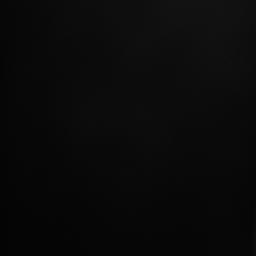
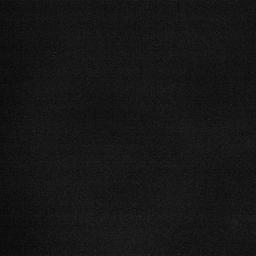
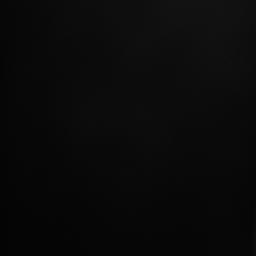
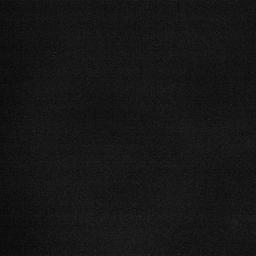
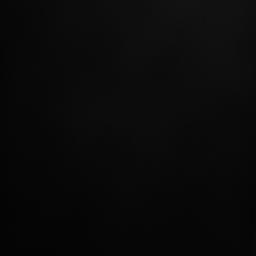
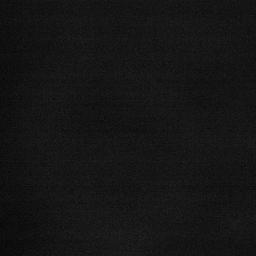
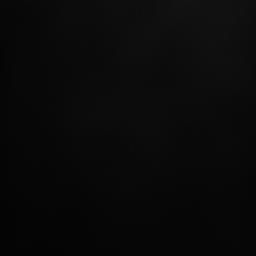
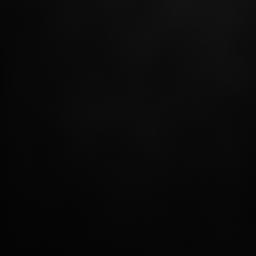
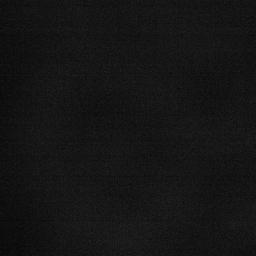
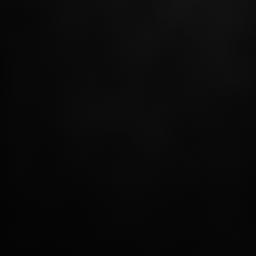
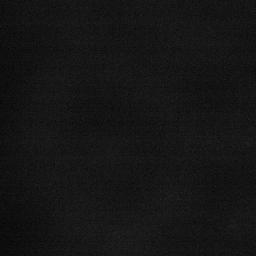
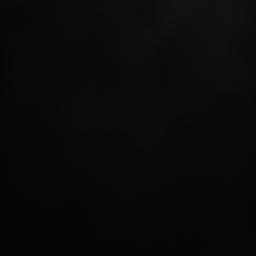
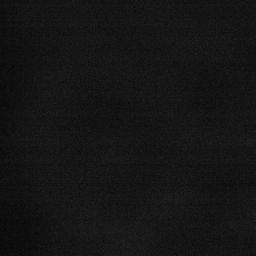
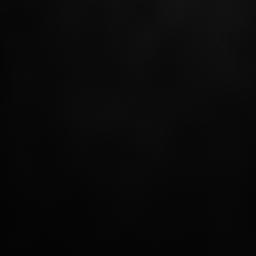
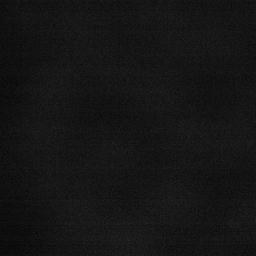
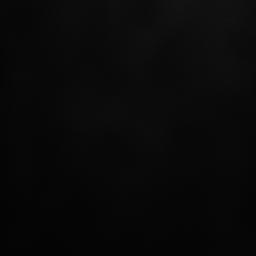
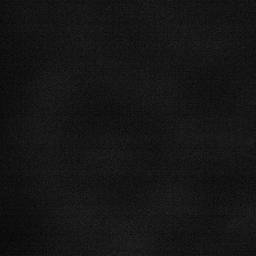
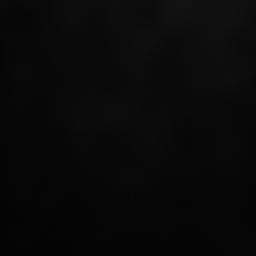
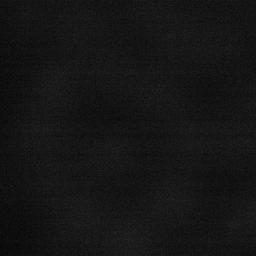
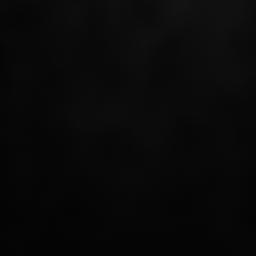
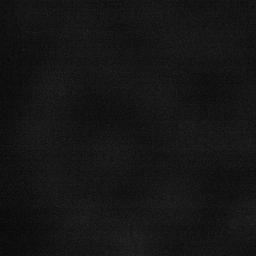
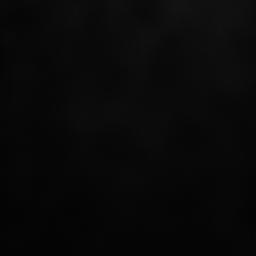
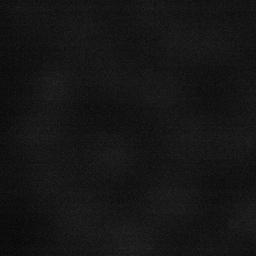
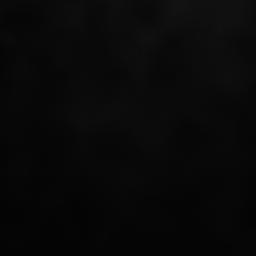
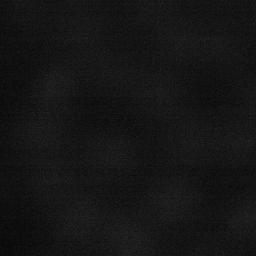
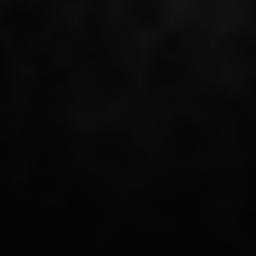
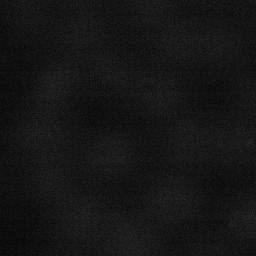
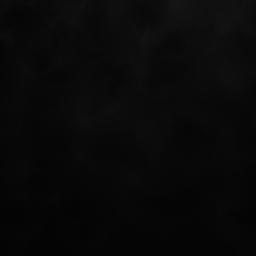
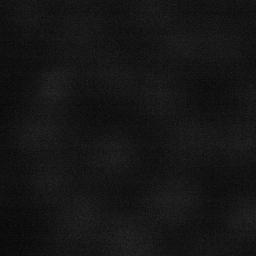
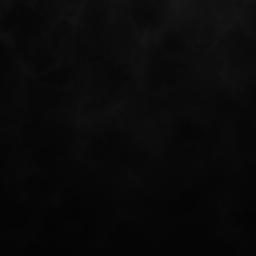
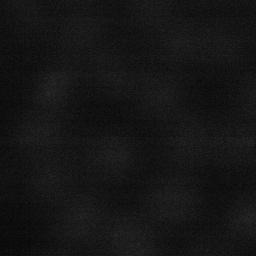
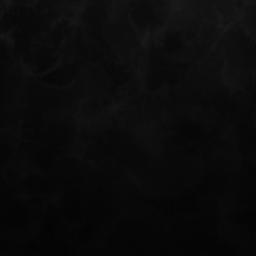
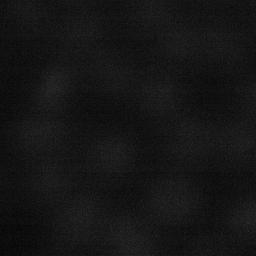
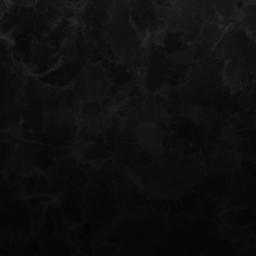
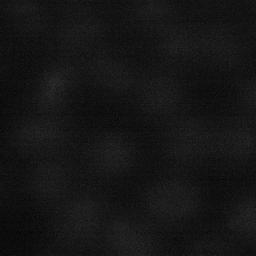
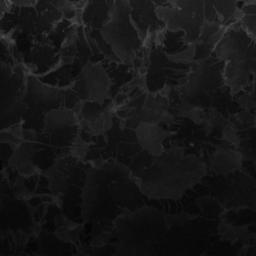
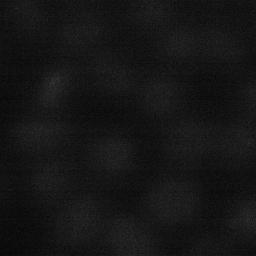
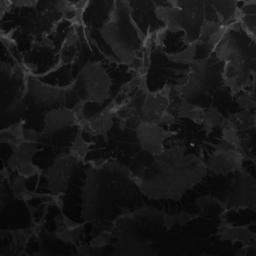
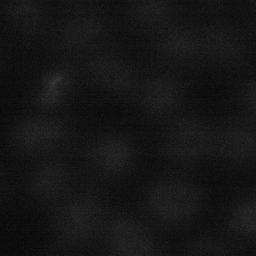
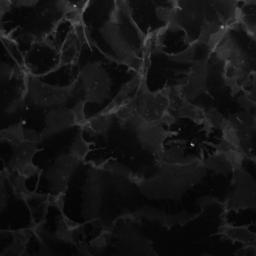
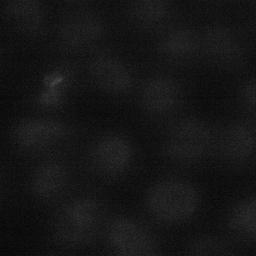
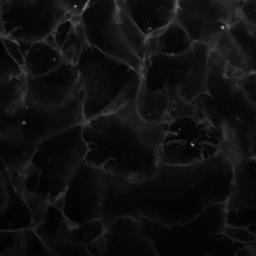
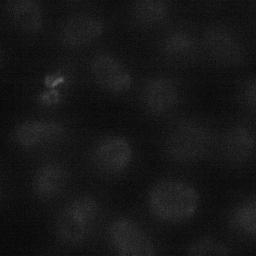
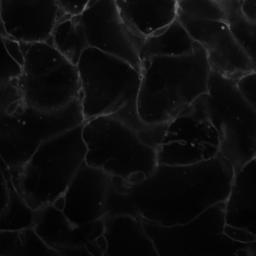
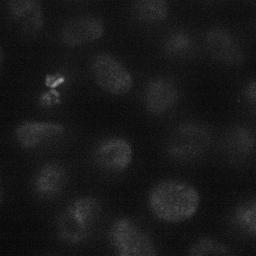
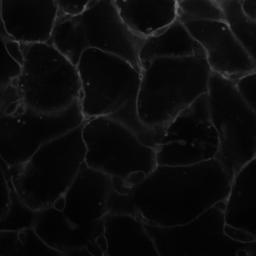
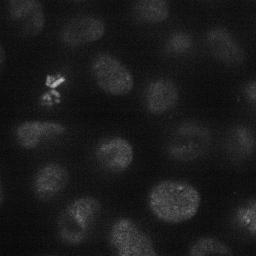
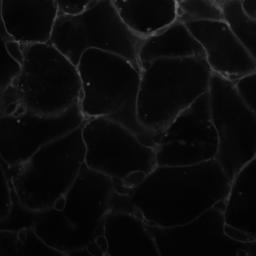
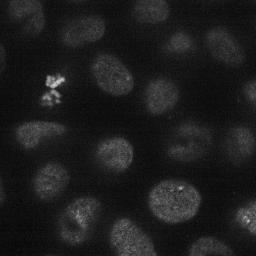
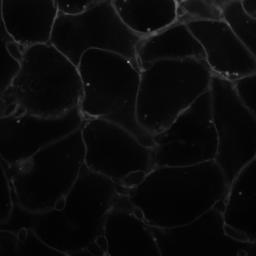
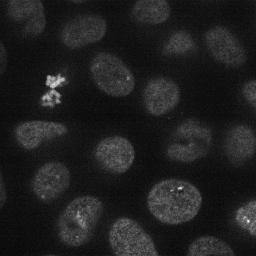
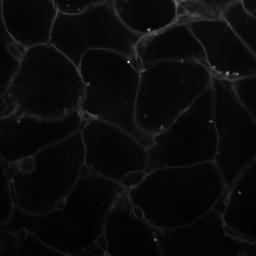
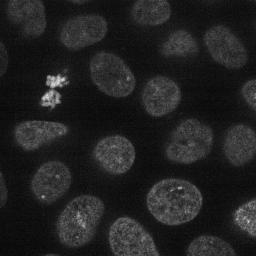
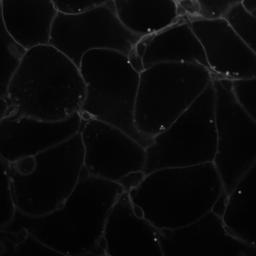
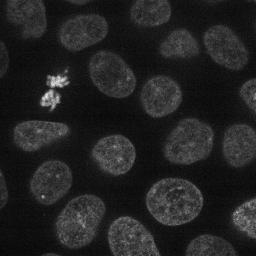
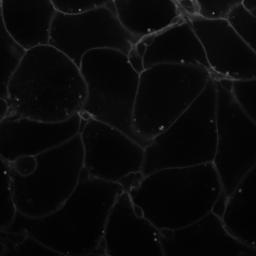
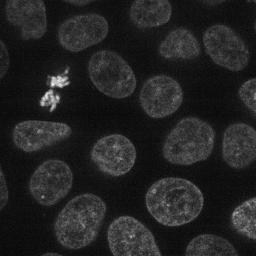
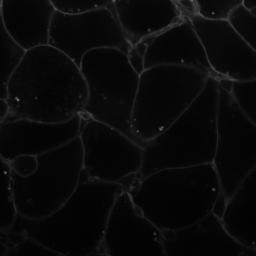
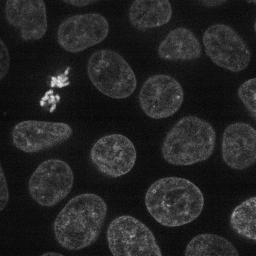
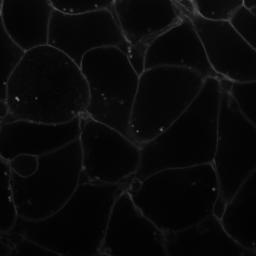
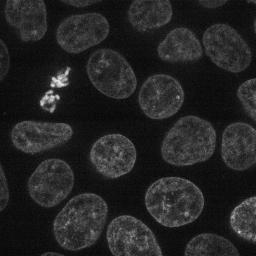
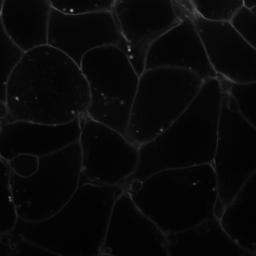
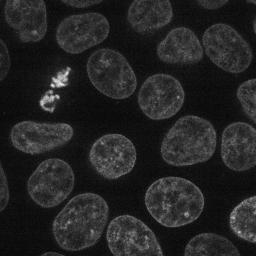
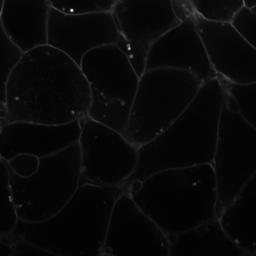
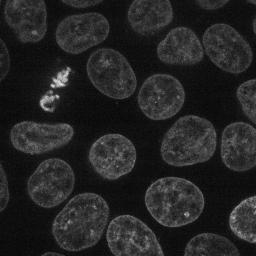
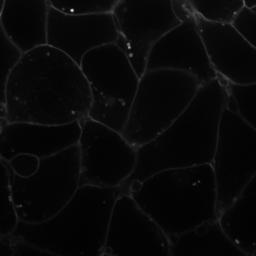
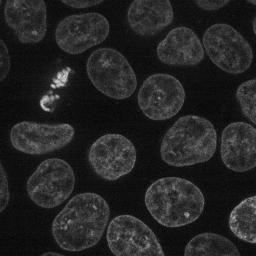
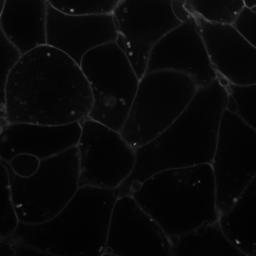
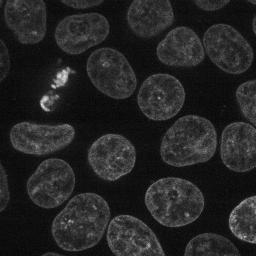
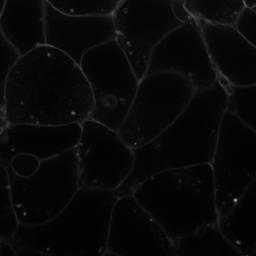
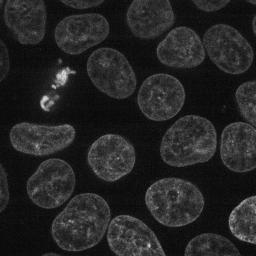
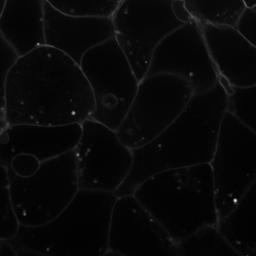
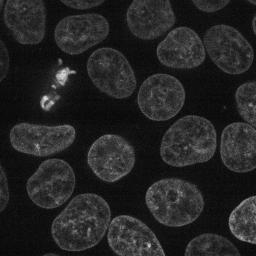
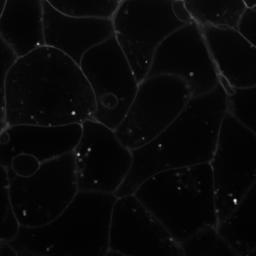
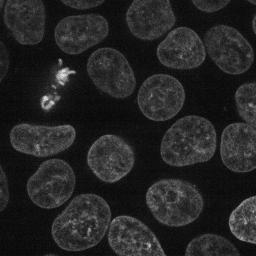
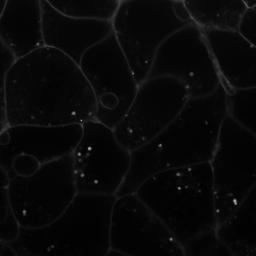
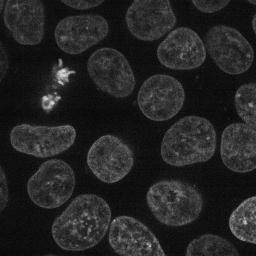
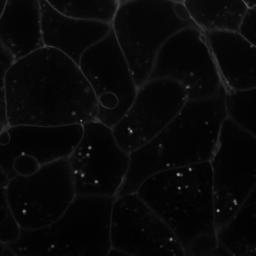
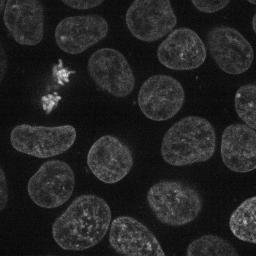
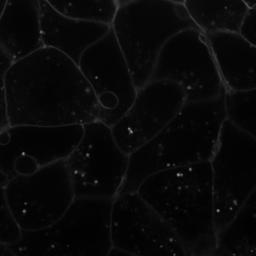
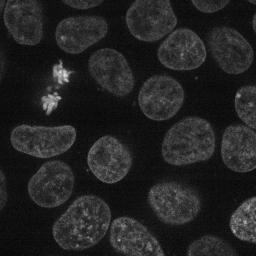
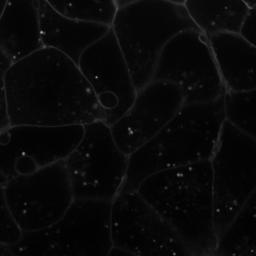
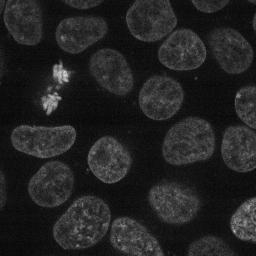
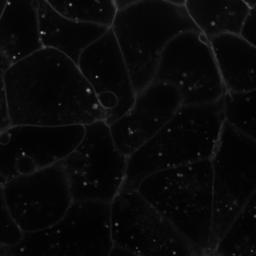
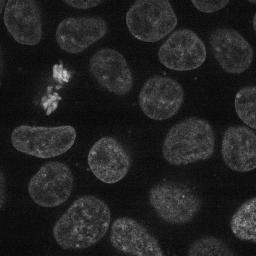
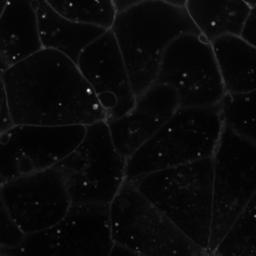
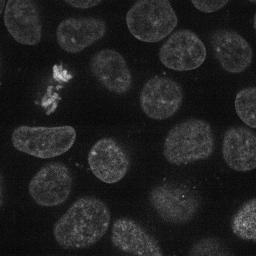
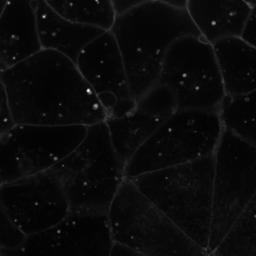
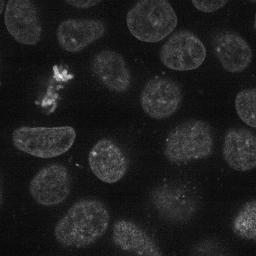
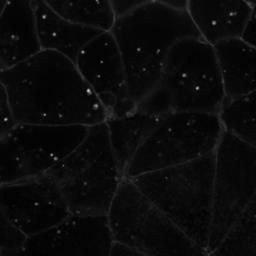
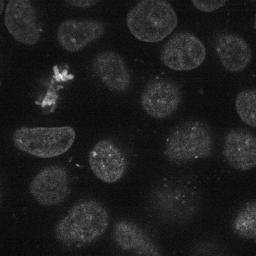
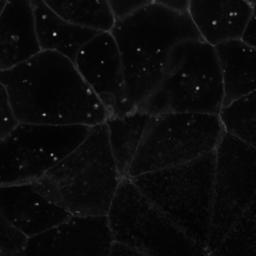
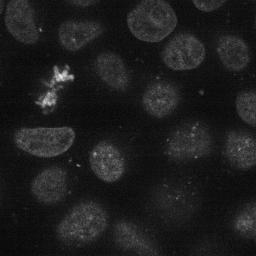
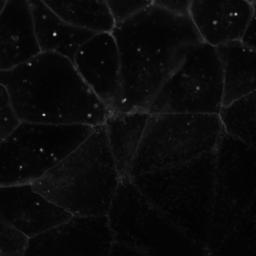
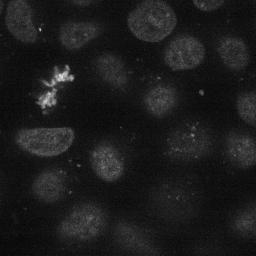
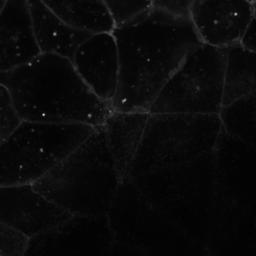
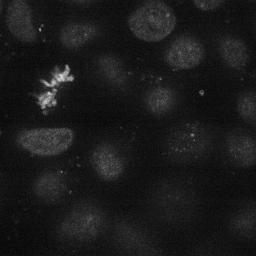
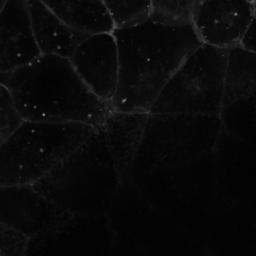
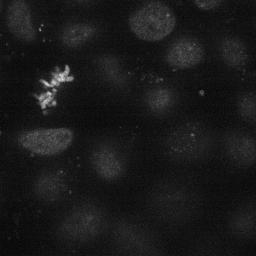
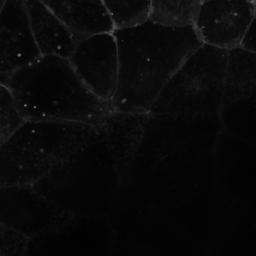
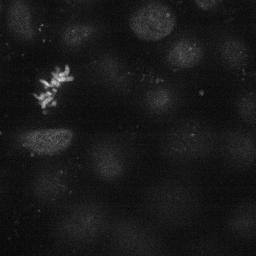
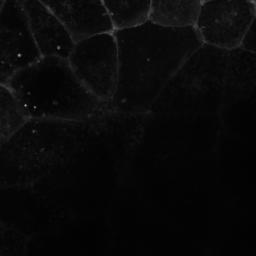
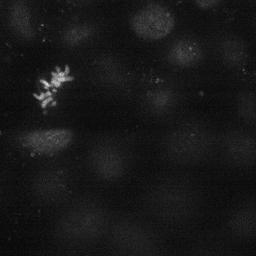
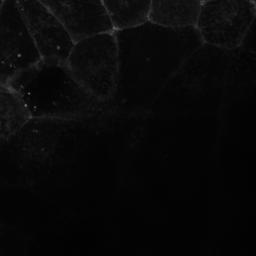
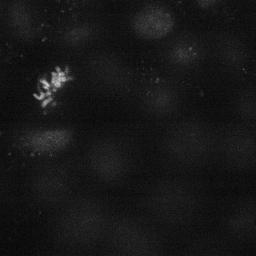
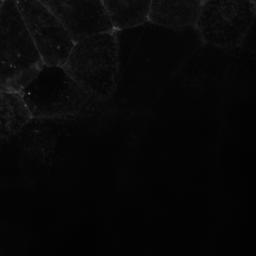
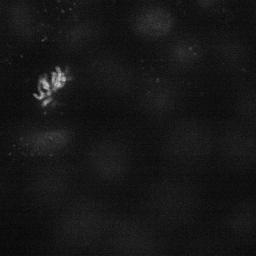
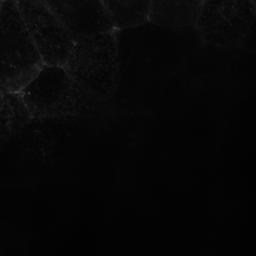
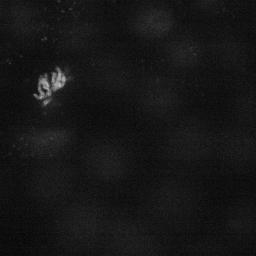
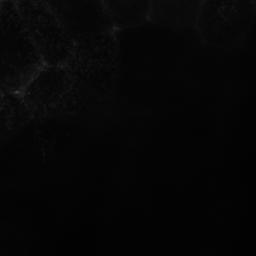
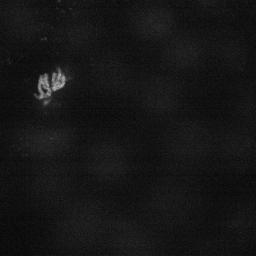
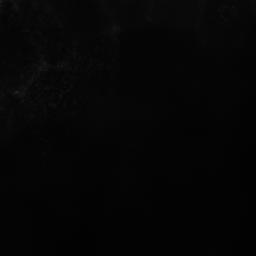
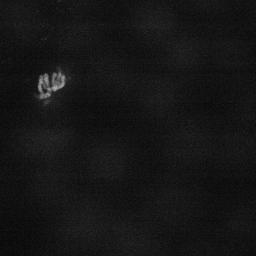
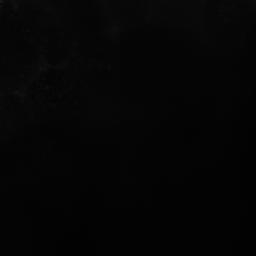
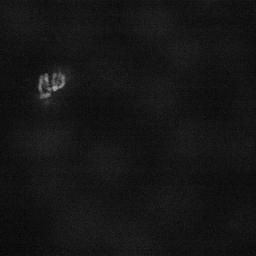
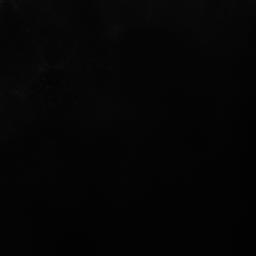
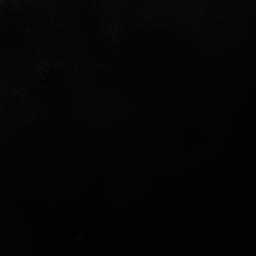
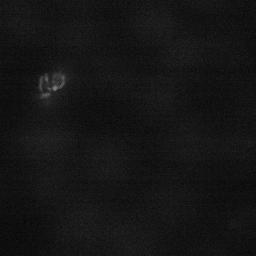
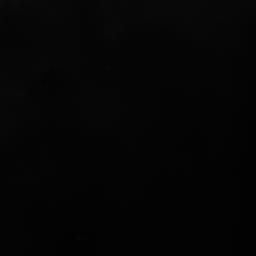
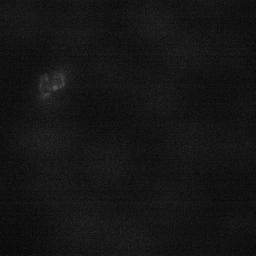

In [ ]:
img = cells3d()
def show_3d_img(img):
  fig = px.imshow(
      img,
      facet_col=1,
      animation_frame=0,
      binary_string=True,
      binary_format="jpg",
  )
  fig.layout.annotations[0]["text"] = "Cell membranes"
  fig.layout.annotations[1]["text"] = "Nuclei"
  plotly.io.show(fig)
show_3d_img(img)

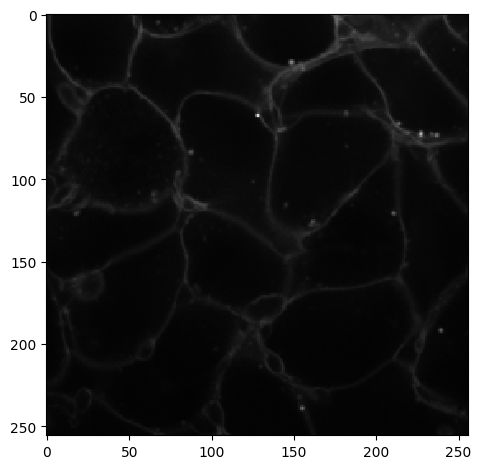

In [ ]:
sk.io.imshow(img[25,0,:,:]) #Membrane

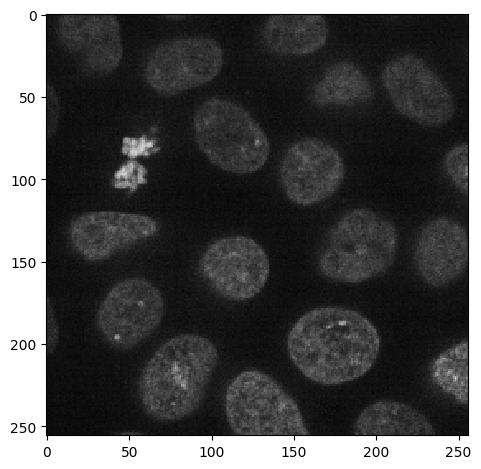

In [ ]:
sk.io.imshow(img[25,1,:,:]) #Nuclei

In [ ]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

In [ ]:
from skimage import img_as_ubyte

noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(img)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0


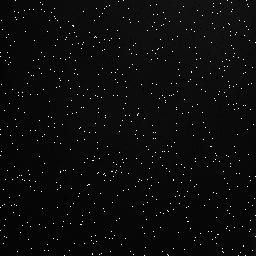
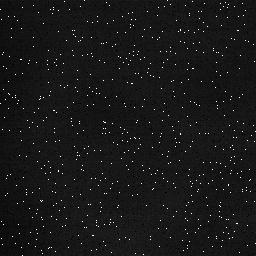
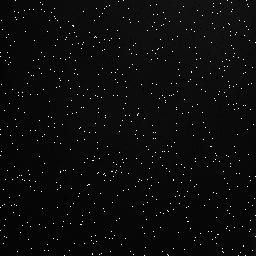
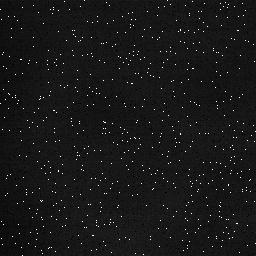
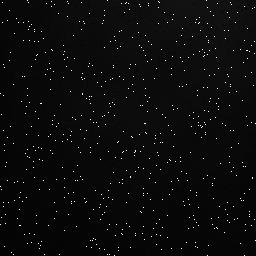
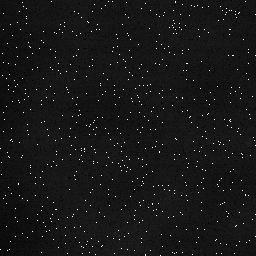
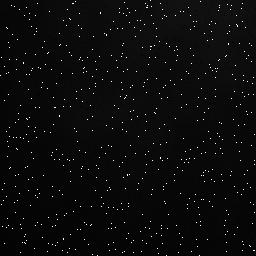
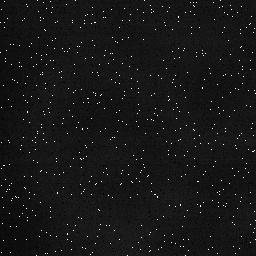
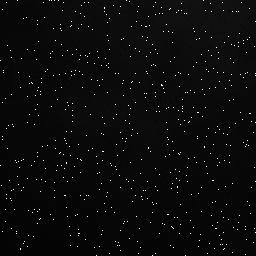
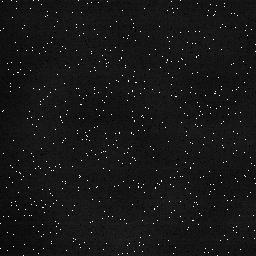
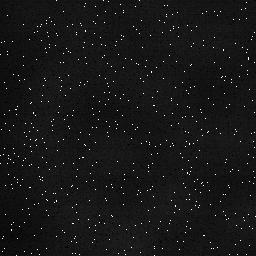
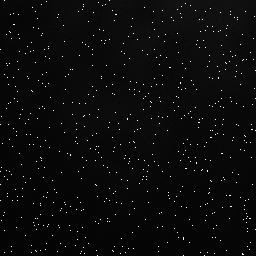
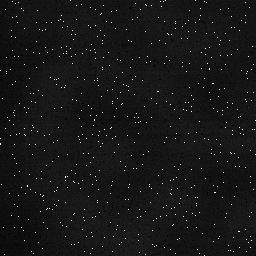
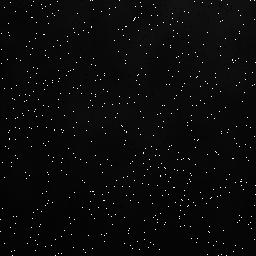
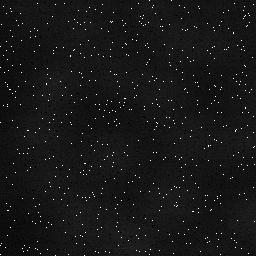
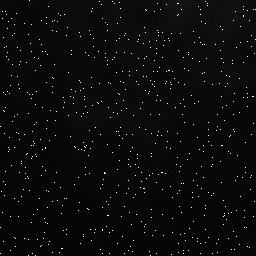
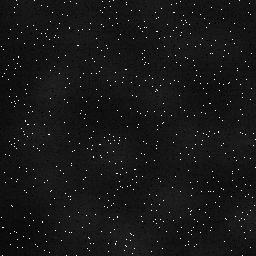
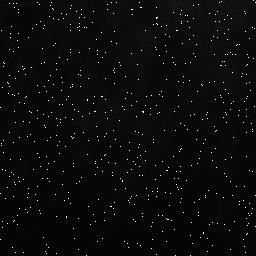
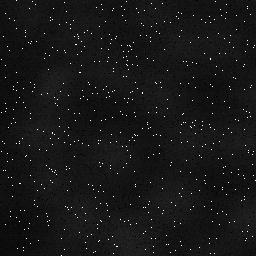
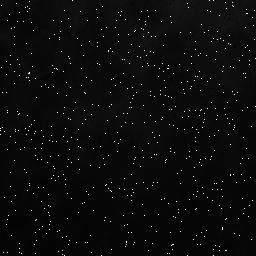
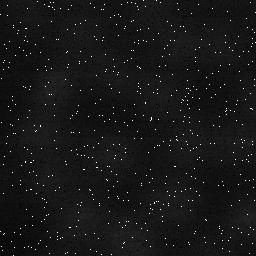
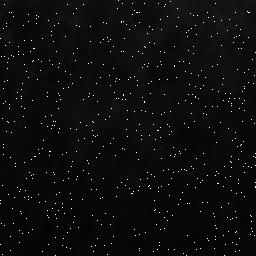
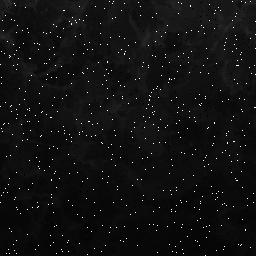
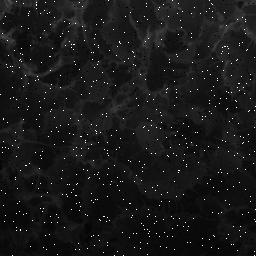
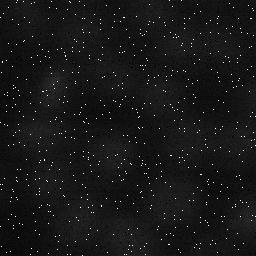
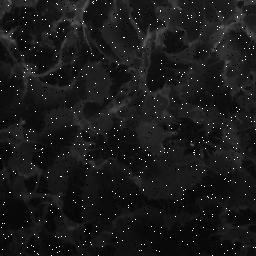
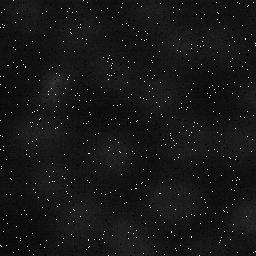
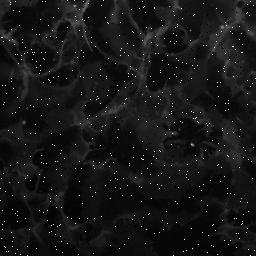
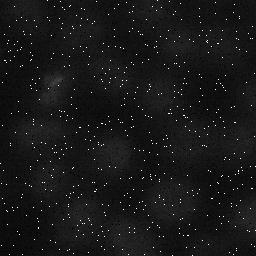
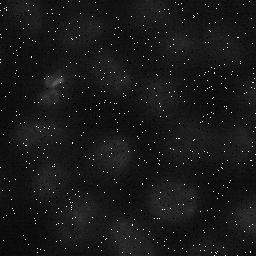
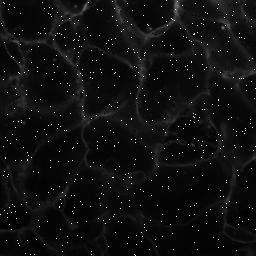
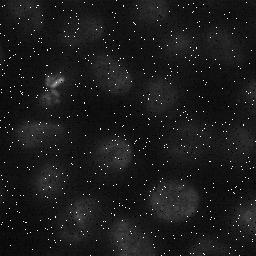
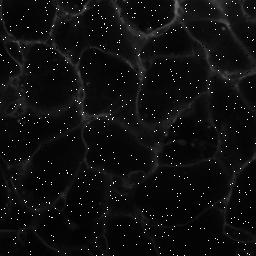
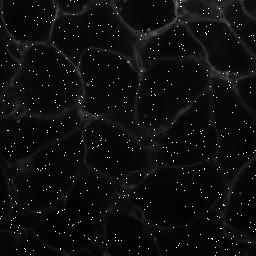
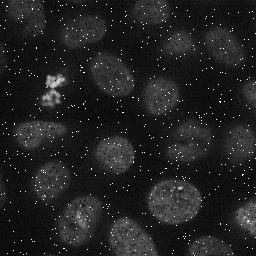
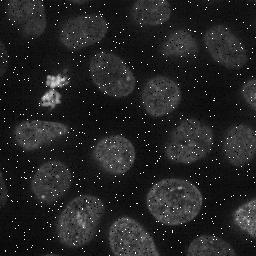
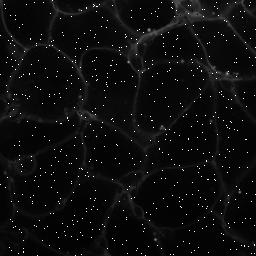
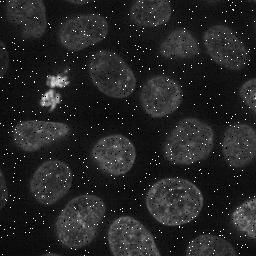
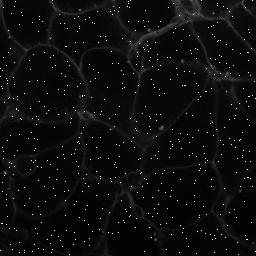
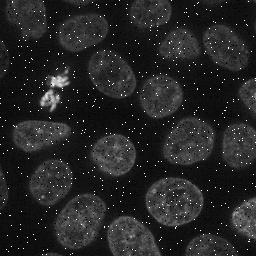
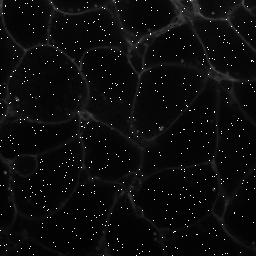
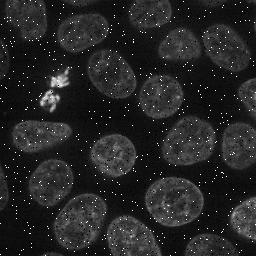
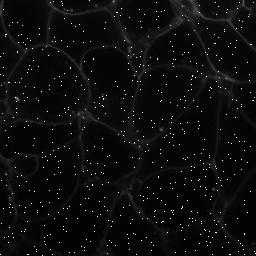
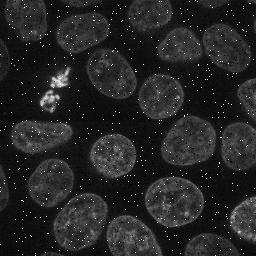
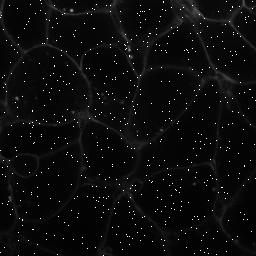
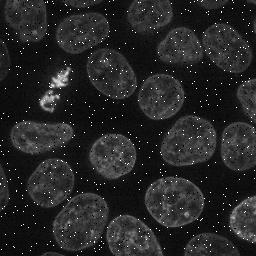
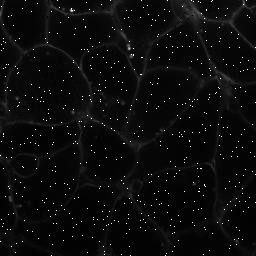
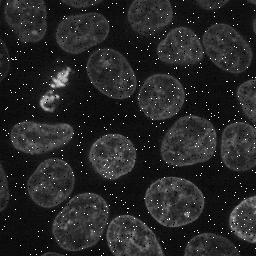
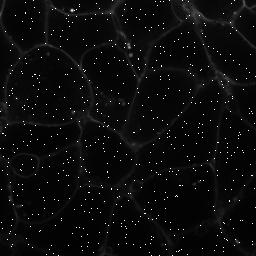
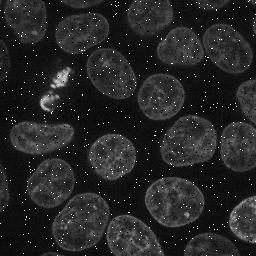
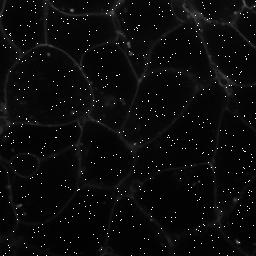
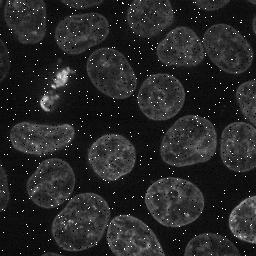
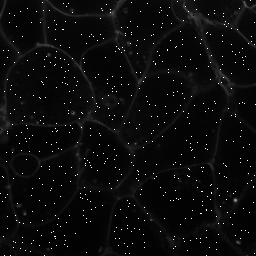
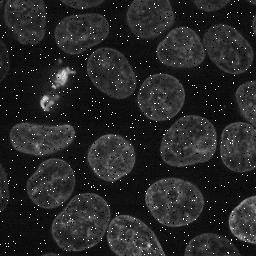
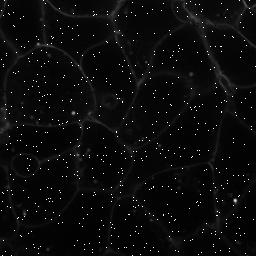
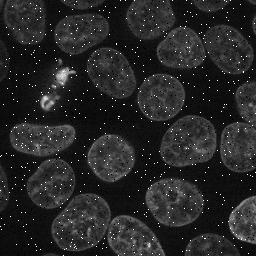
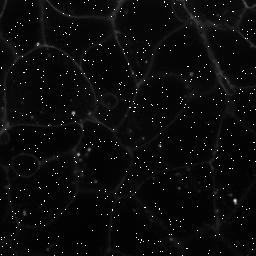
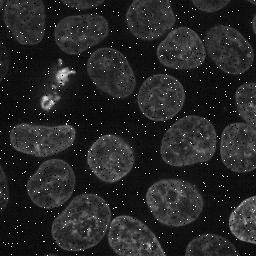
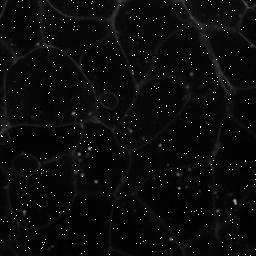
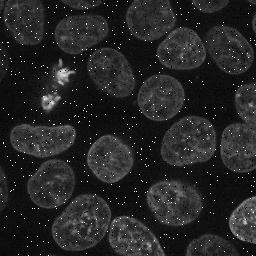
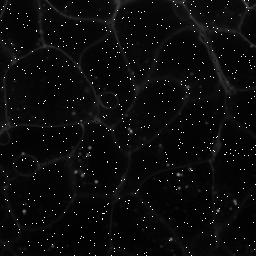
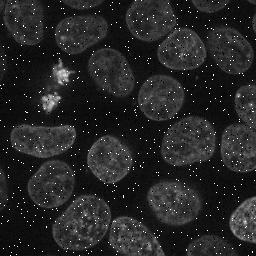
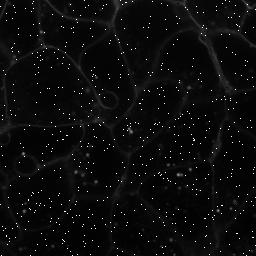
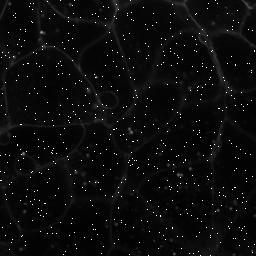
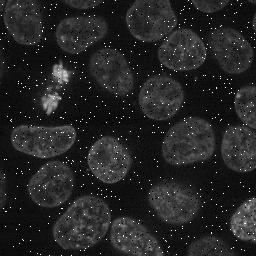
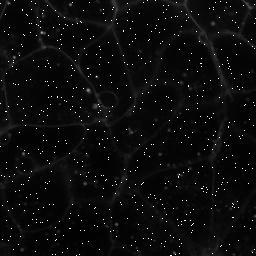
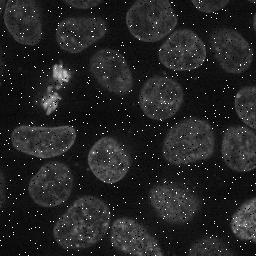
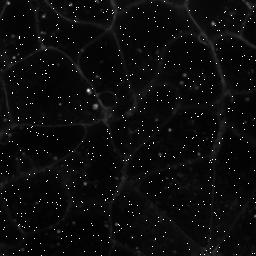
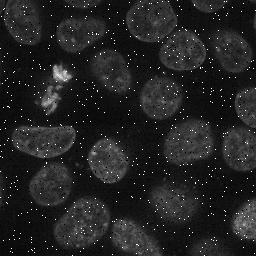
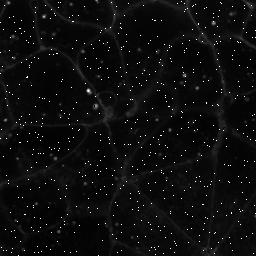
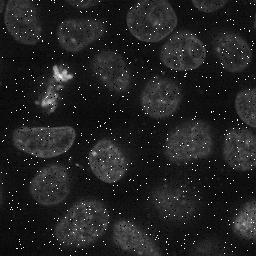
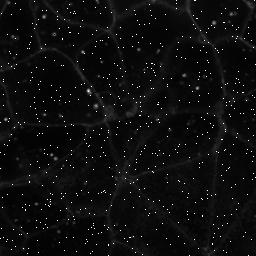
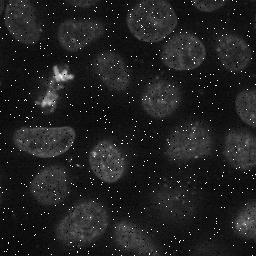
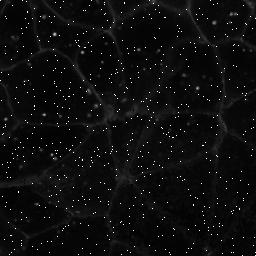
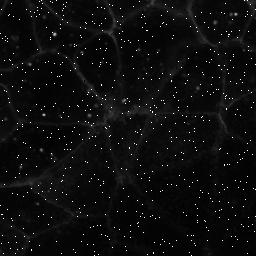
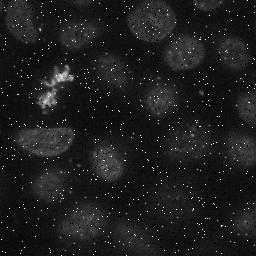
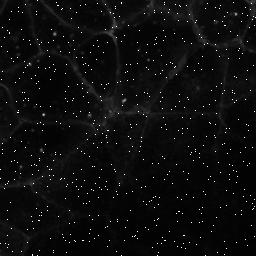
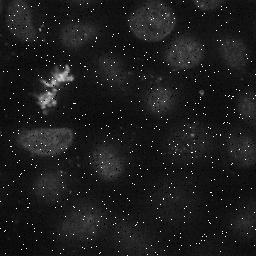
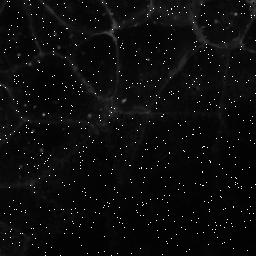
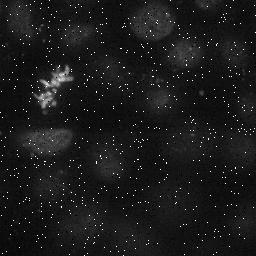
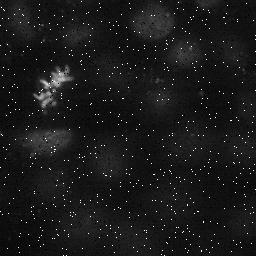
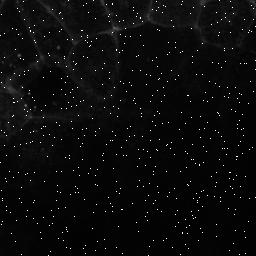
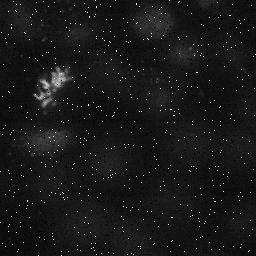
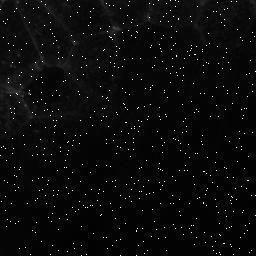
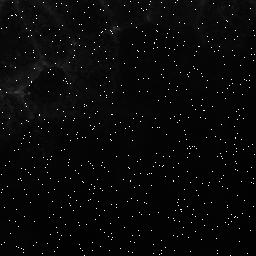
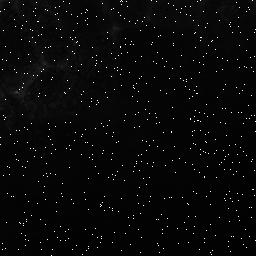
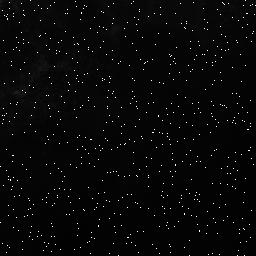
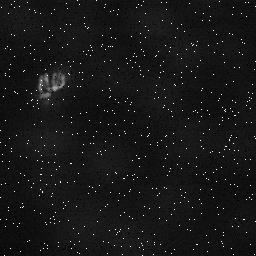
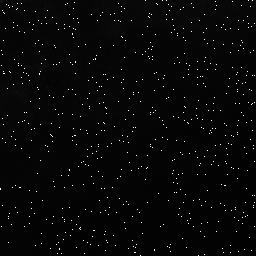
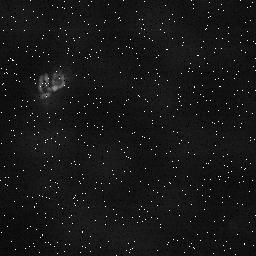
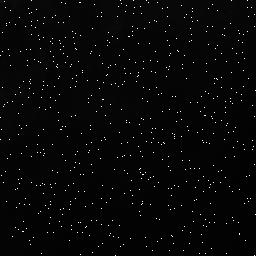
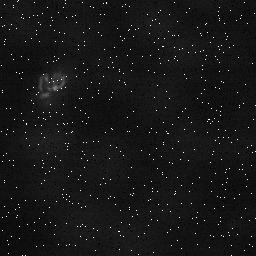
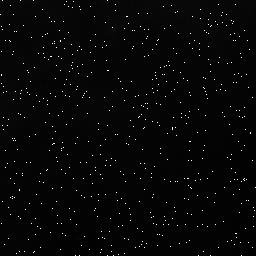
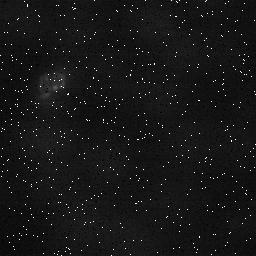

In [ ]:
show_3d_img(noisy_image)


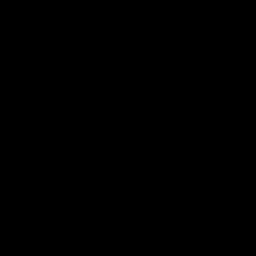
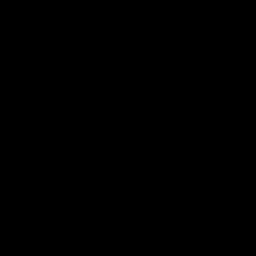
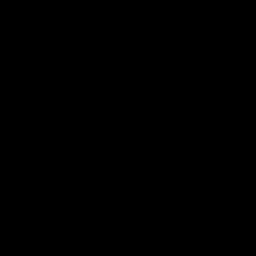
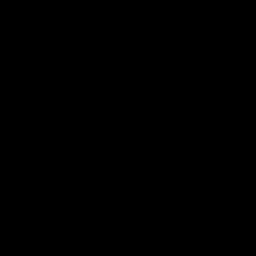
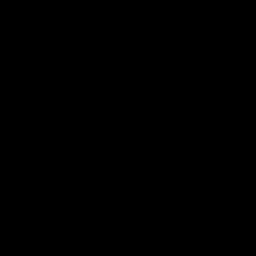
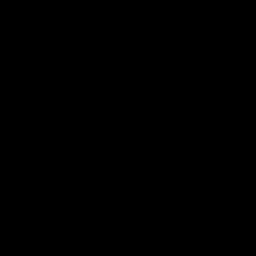
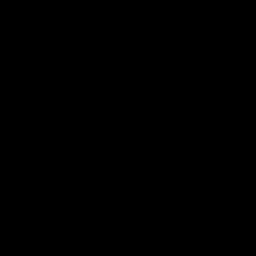
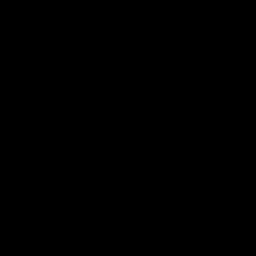
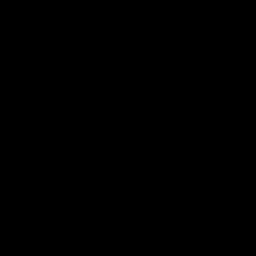
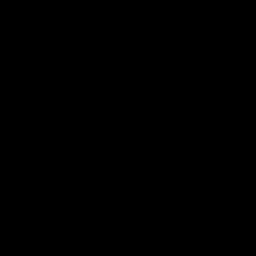
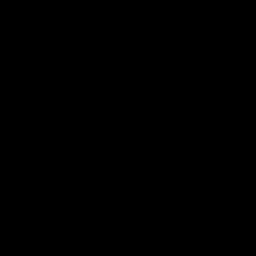
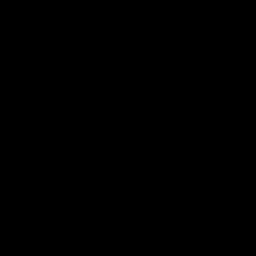
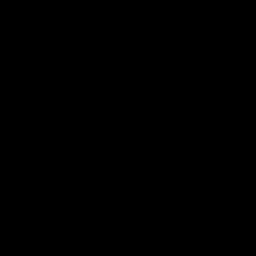
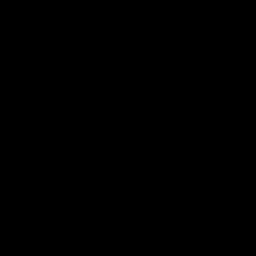
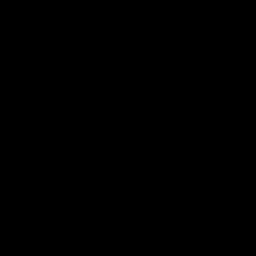
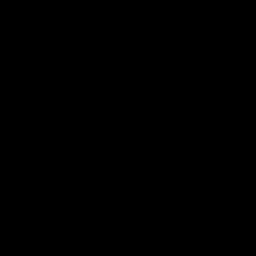
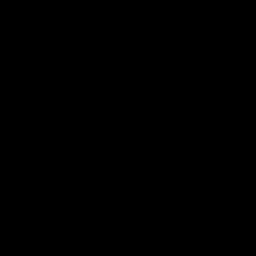
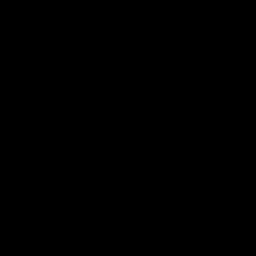
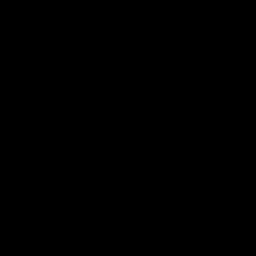
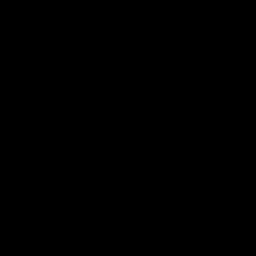
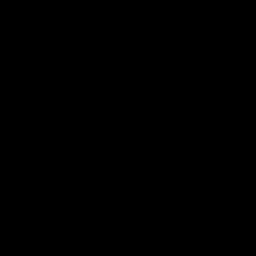
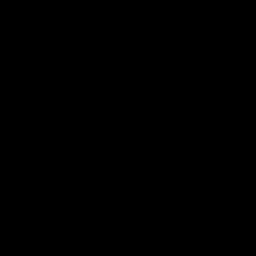
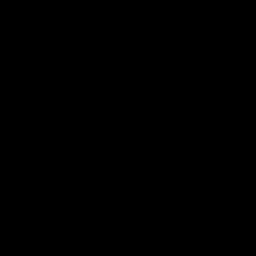
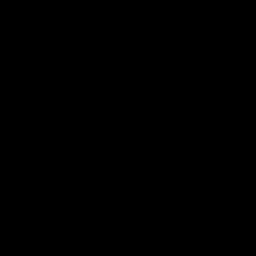
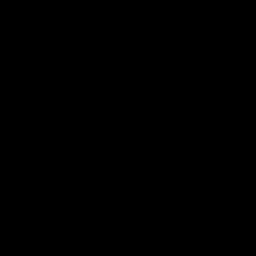
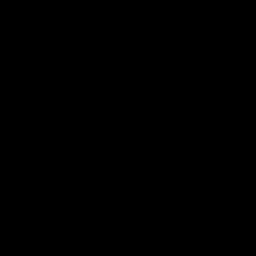
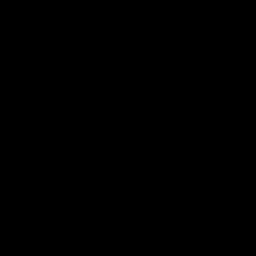
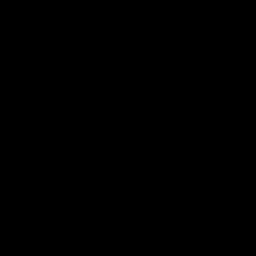
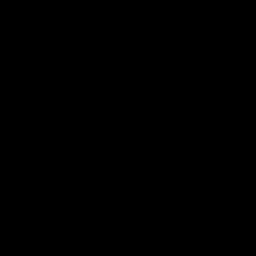
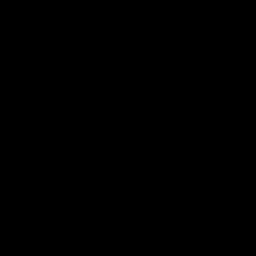
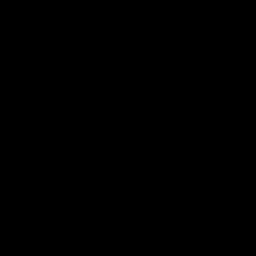
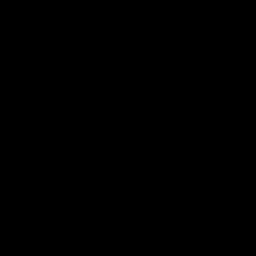
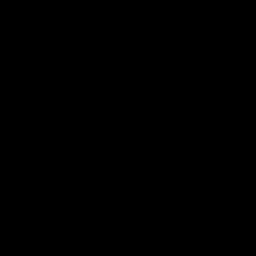
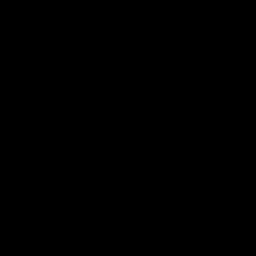
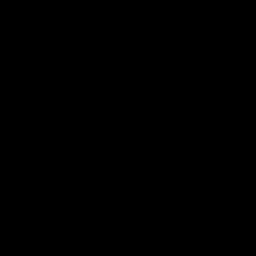
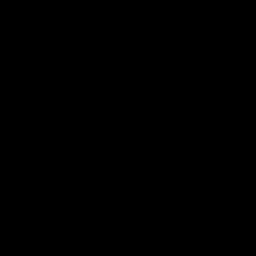
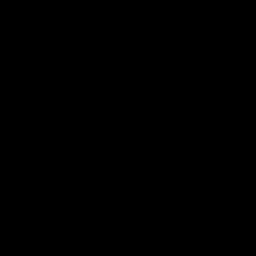
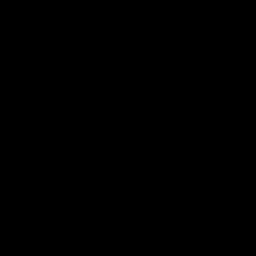
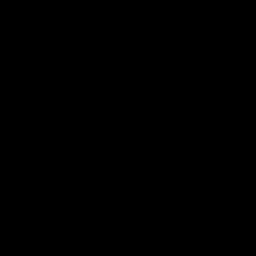
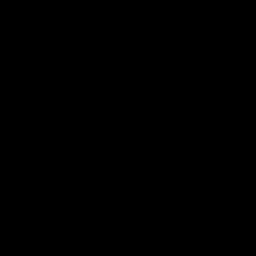
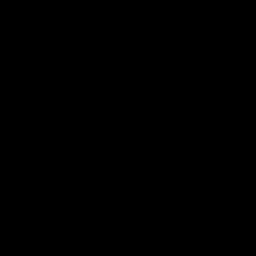
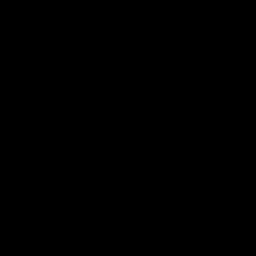
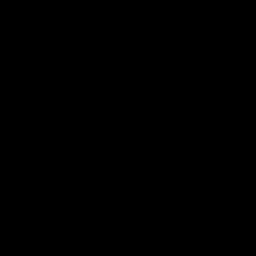
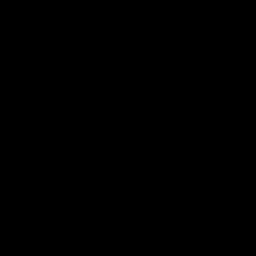
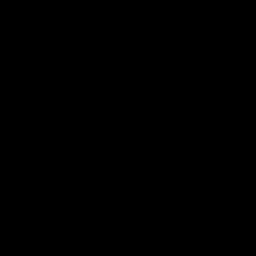
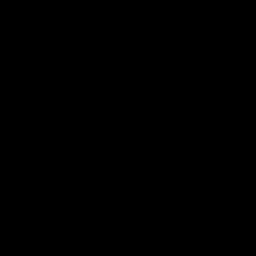
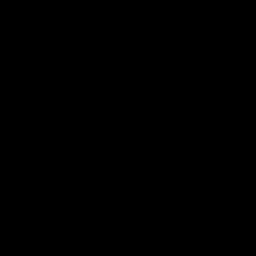
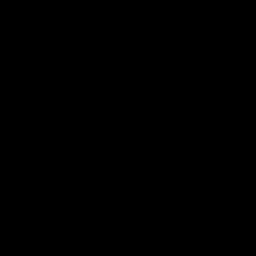
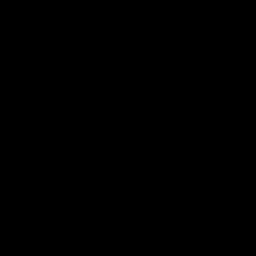
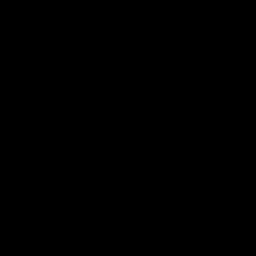
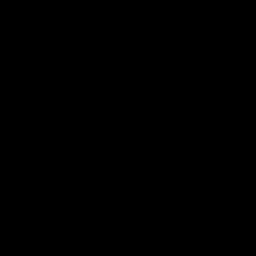
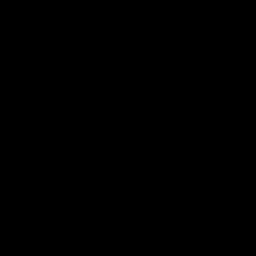
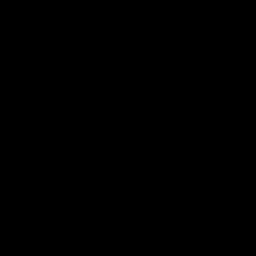
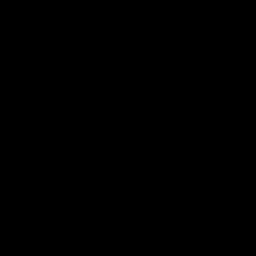
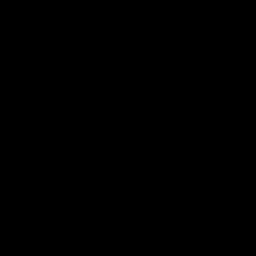
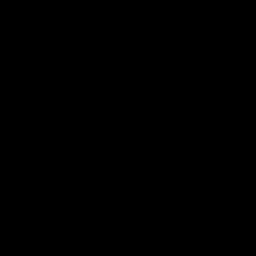
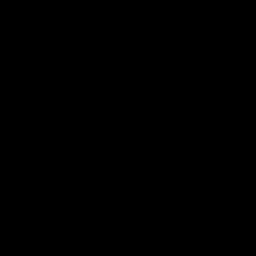
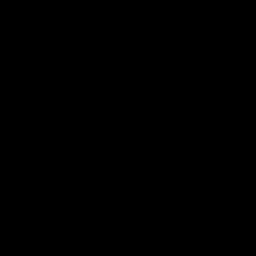
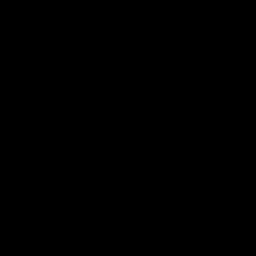
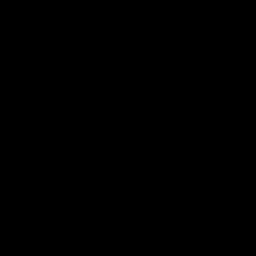
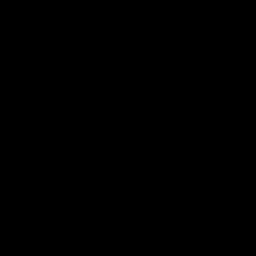
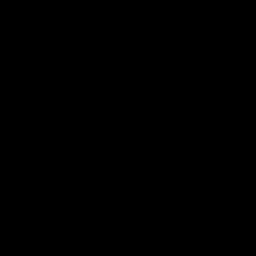
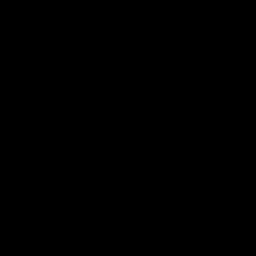
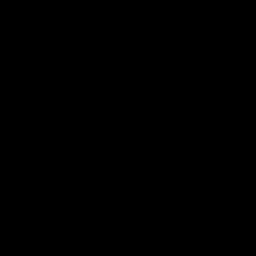
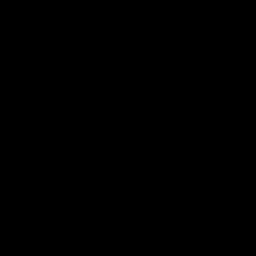
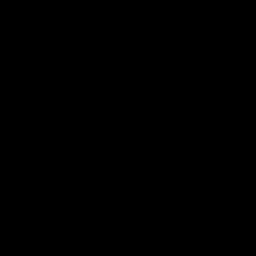
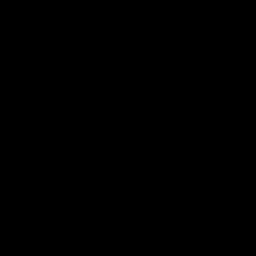
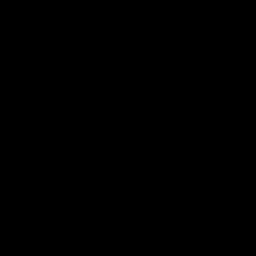
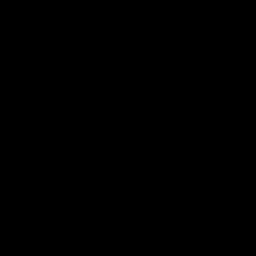
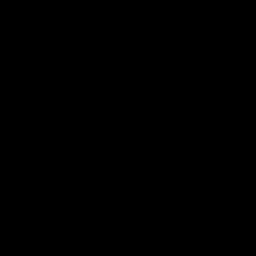
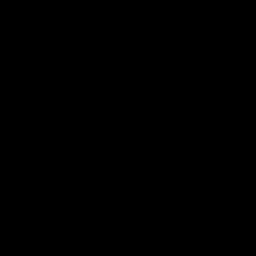
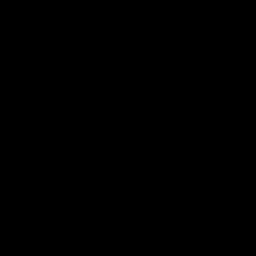
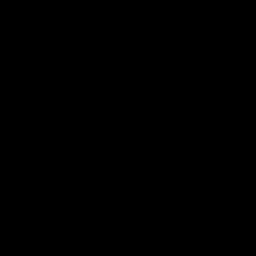
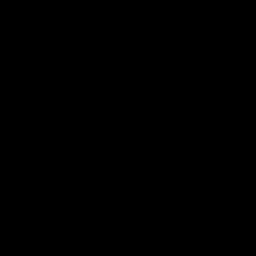
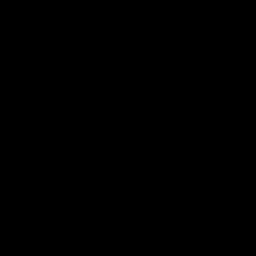
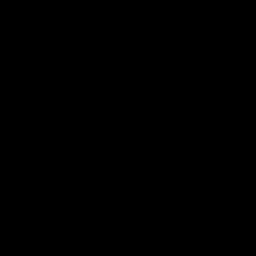
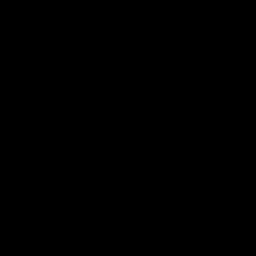
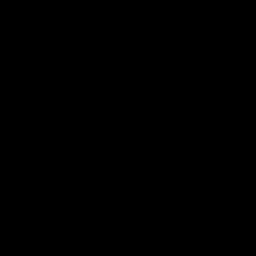
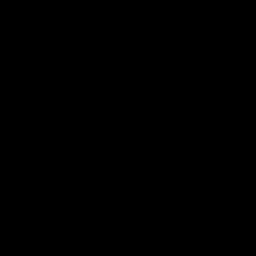
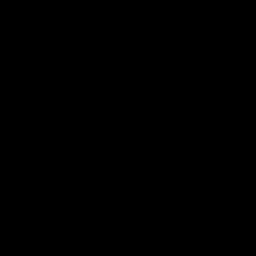
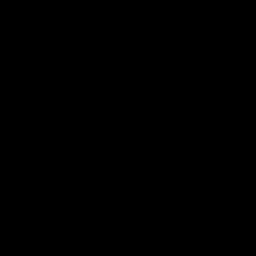
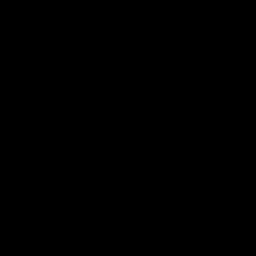
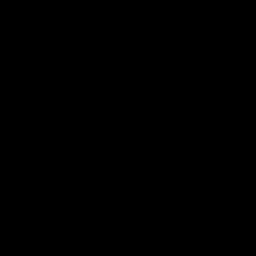
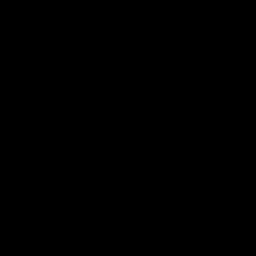
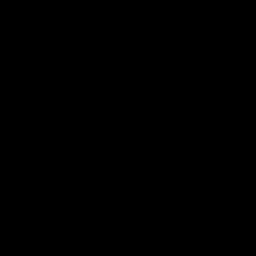
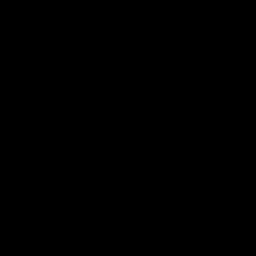
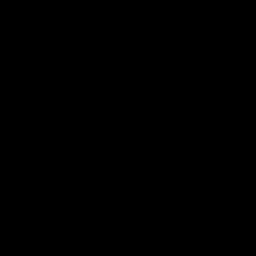
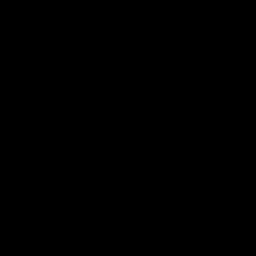
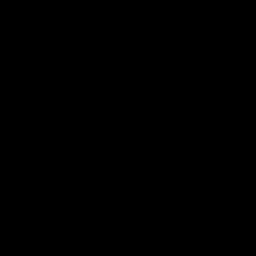
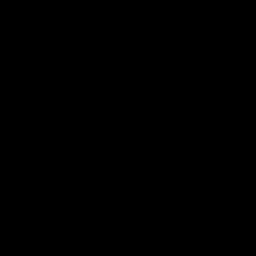
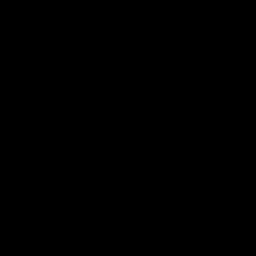
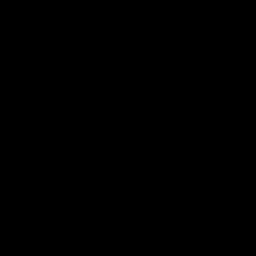
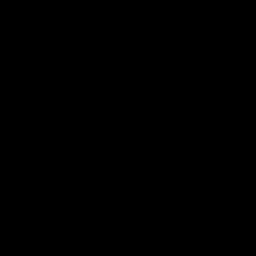
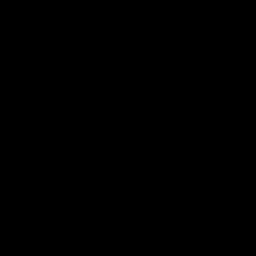
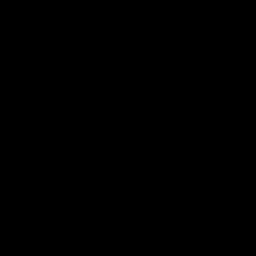
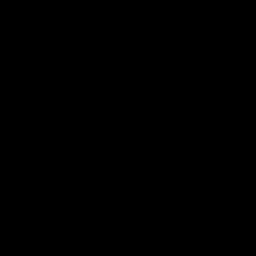
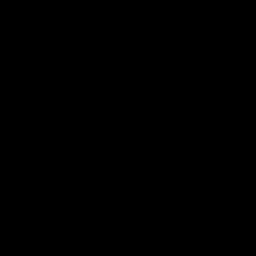
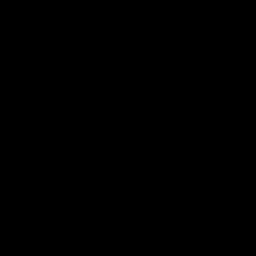
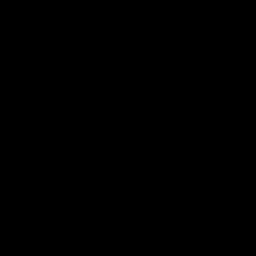
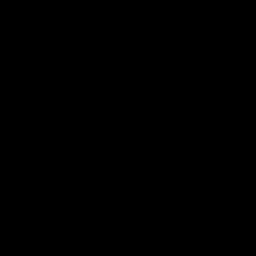
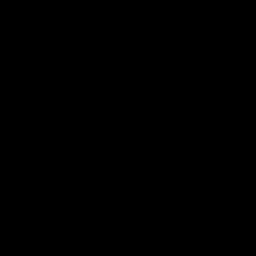
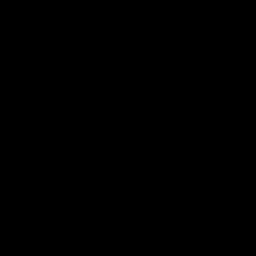
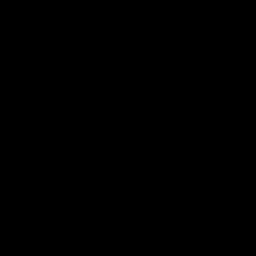
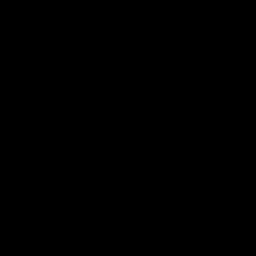
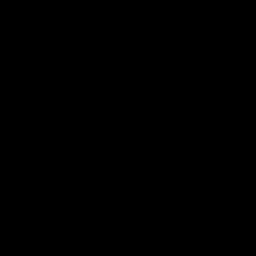
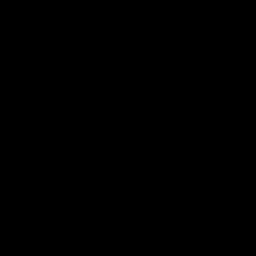
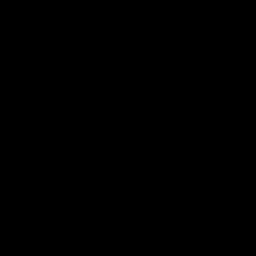
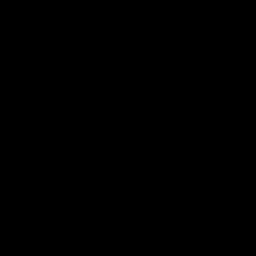
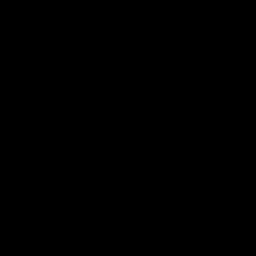
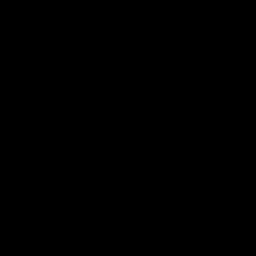
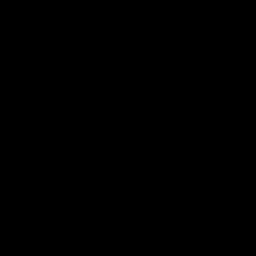
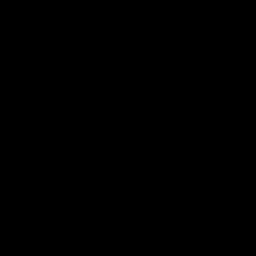
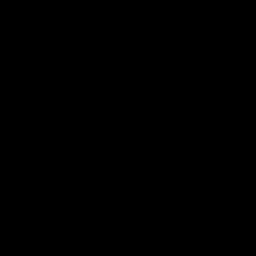
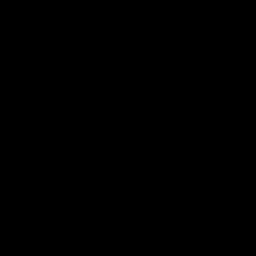
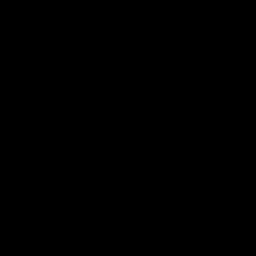
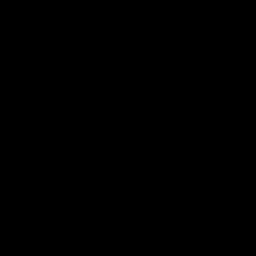
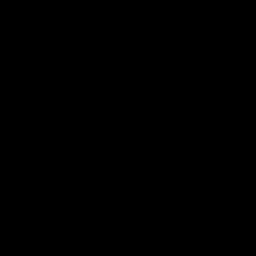
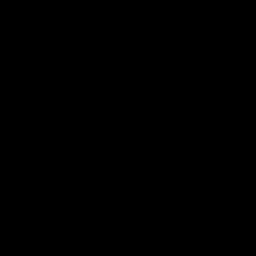
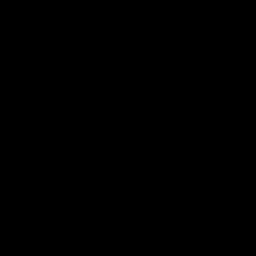
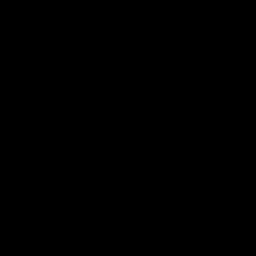
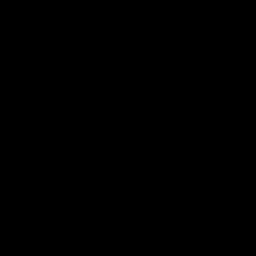
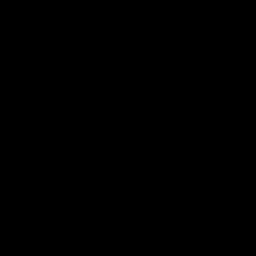

In [ ]:
from skimage.filters import roberts, sobel
img = cells3d()
roberts_cell = img
sobel_cell = img
for layer in range(60):
  for channel in range(2):
    edge_roberts = roberts(img[layer,channel,:,:])
    roberts_cell[layer, channel, :, :] = edge_roberts
    edge_sobel = sobel(img[layer, channel, :, :])
    sobel_cell[layer, channel, :, :] = edge_sobel

show_3d_img(sobel_cell)

# Cell Membrane

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 800x500 with 8 Axes>,
 array([<Axes: title={'center': 'Original'}>,
        <Axes: title={'center': 'Isodata'}>,
        <Axes: title={'center': 'Li'}>, <Axes: title={'center': 'Mean'}>,
        <Axes: title={'center': 'Minimum'}>,
        <Axes: title={'center': 'Otsu'}>,
        <Axes: title={'center': 'Triangle'}>,
        <Axes: title={'center': 'Yen'}>], dtype=object))

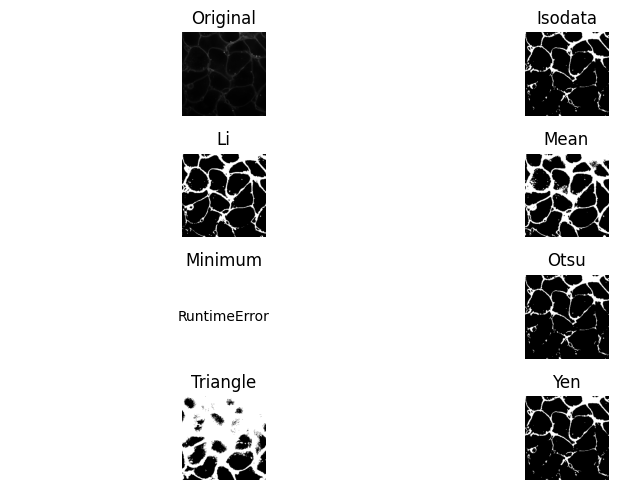

In [ ]:
from skimage.filters import try_all_threshold
img = cells3d()
test_img = img[25,0,:,:]
thresh = try_all_threshold(test_img)
thresh


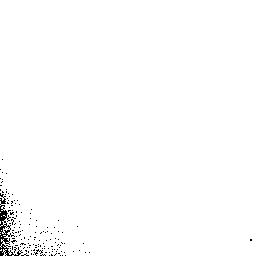
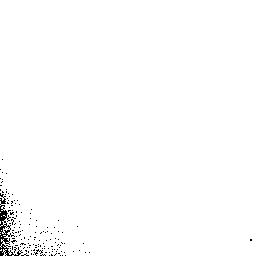
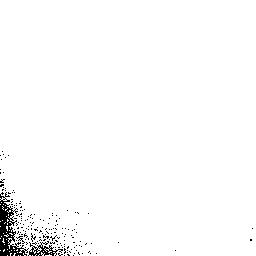
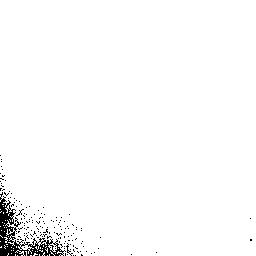
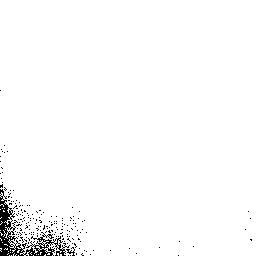
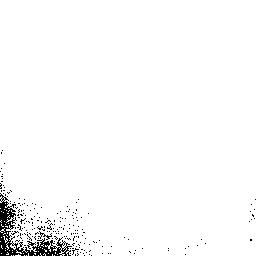
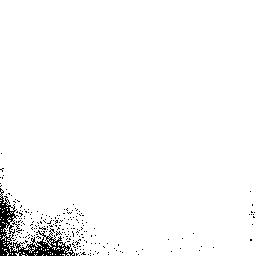
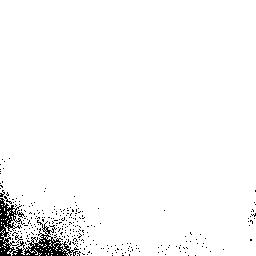
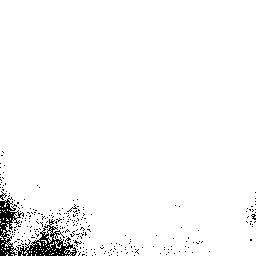
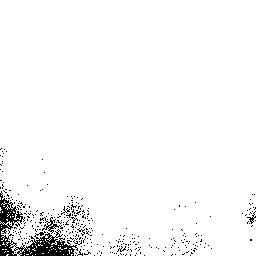
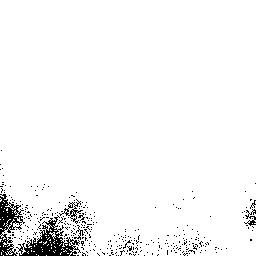
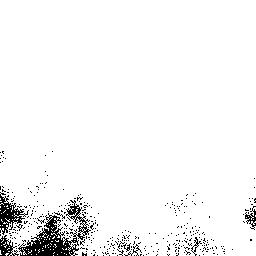
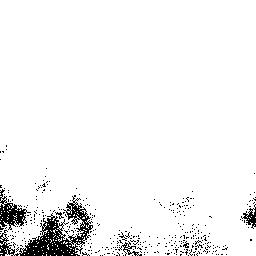
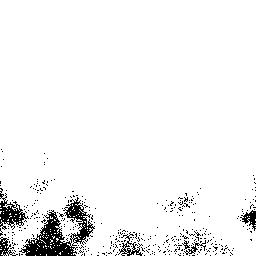
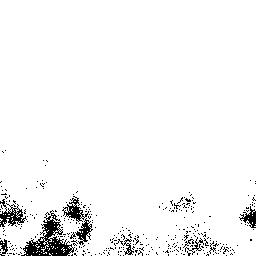
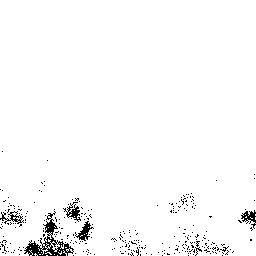
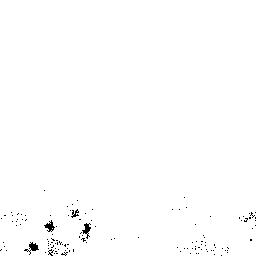
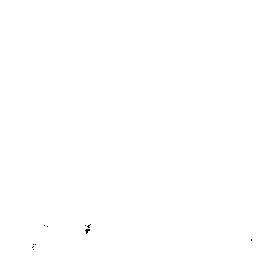
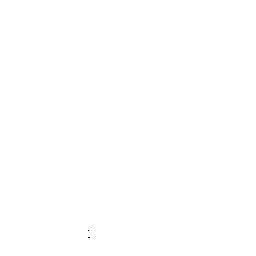
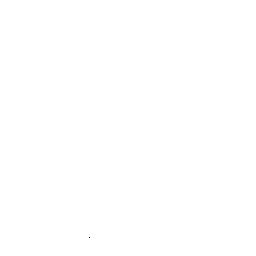
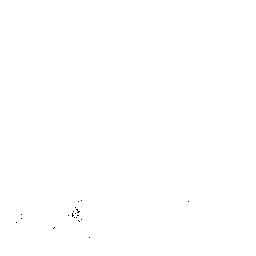
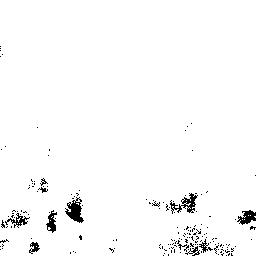
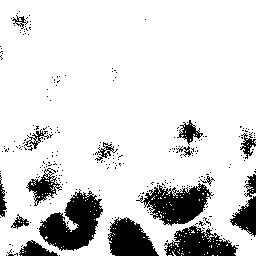
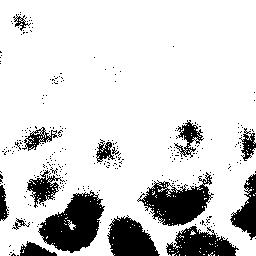
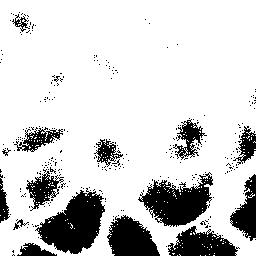
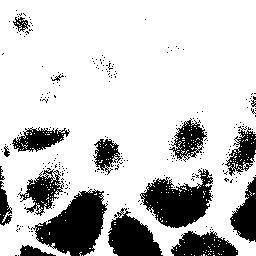
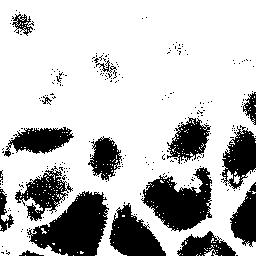
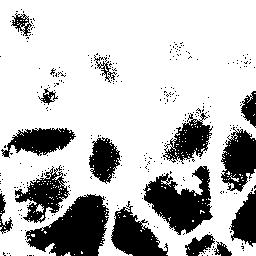
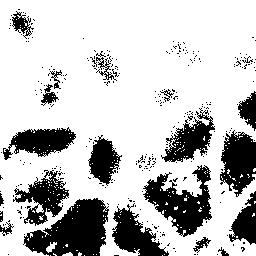
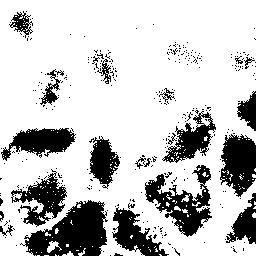
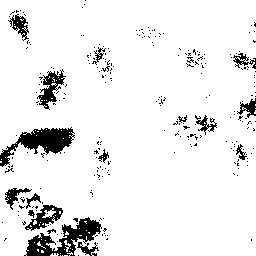
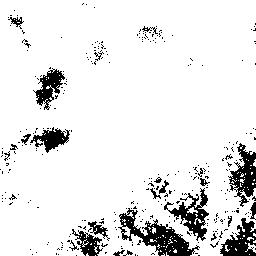
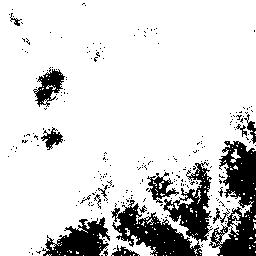
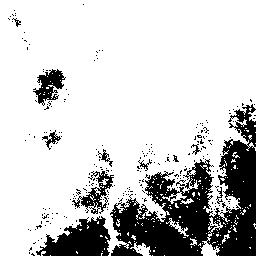
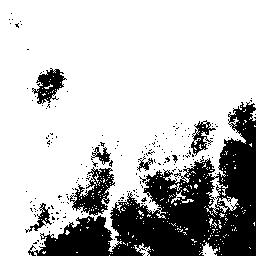
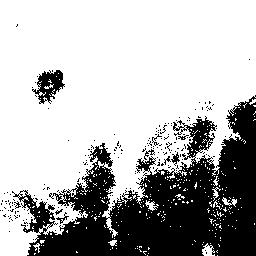
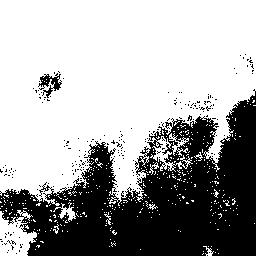
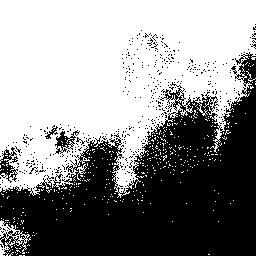
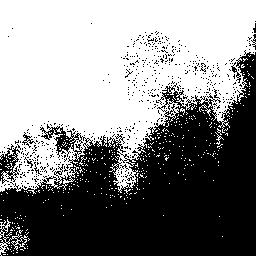
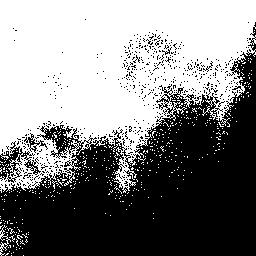
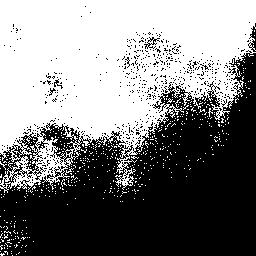
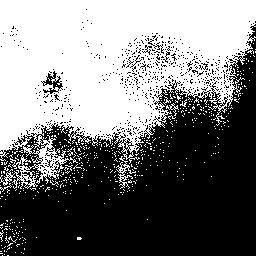

In [ ]:
from skimage.filters import threshold_li, threshold_otsu
from matplotlib import gridspec
img = cells3d()
test_img = img[:,0,:,:]
for layer in range(60):
  img_thresh = img[layer,0,:,:]
  thresh_li = threshold_li(img_thresh)
  I_li = test_img > thresh_li

  thresh_otsu = threshold_otsu(img_thresh)
  I_otsu = test_img > thresh_otsu

fig = px.imshow(
    I_li,
    animation_frame=0,
    binary_string=True,
    binary_format="jpg",
)

plotly.io.show(fig)


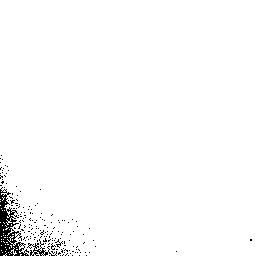
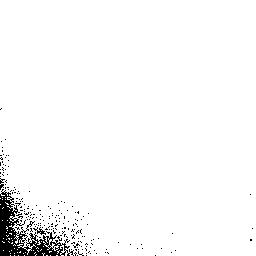
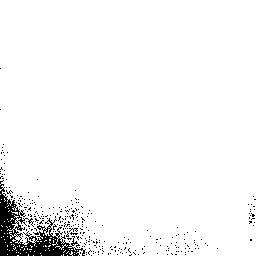
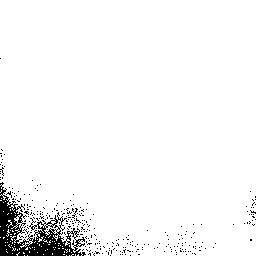
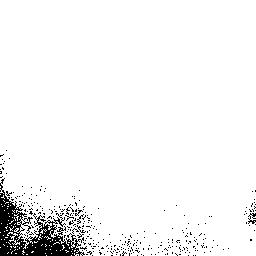
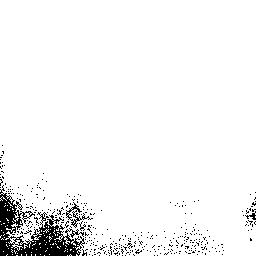
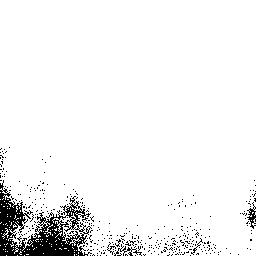
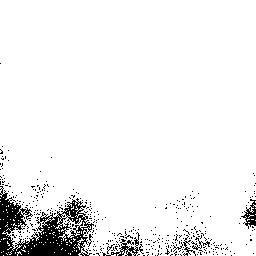
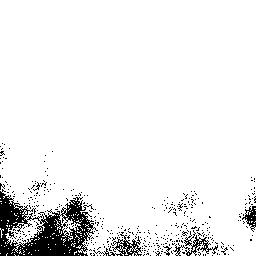
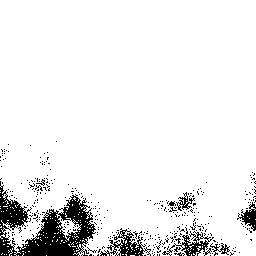
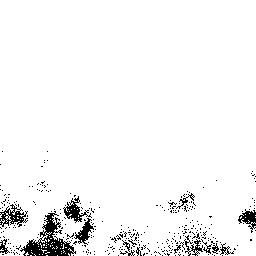
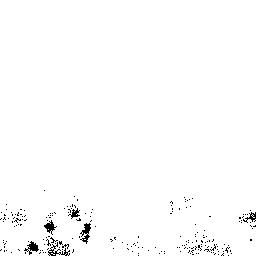
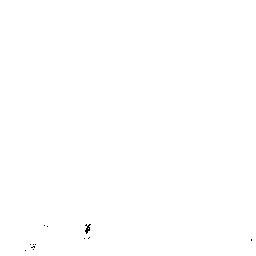
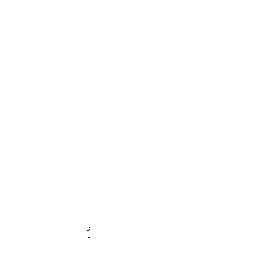
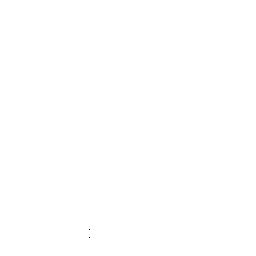
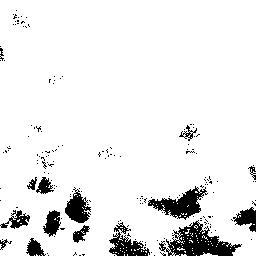
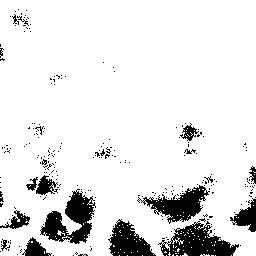
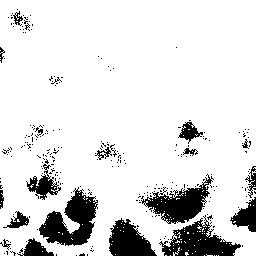
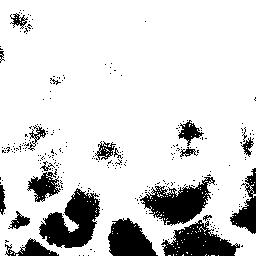
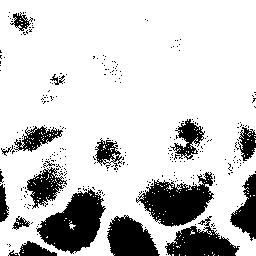
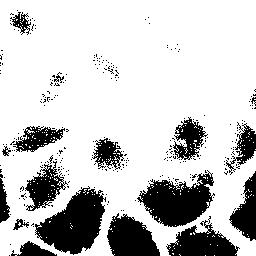
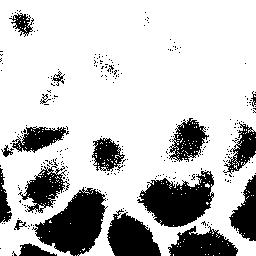
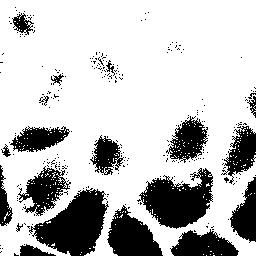
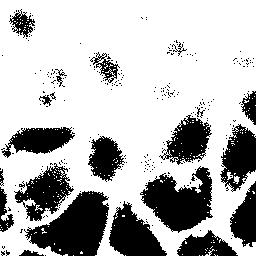
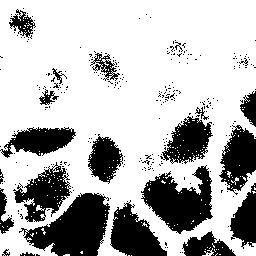
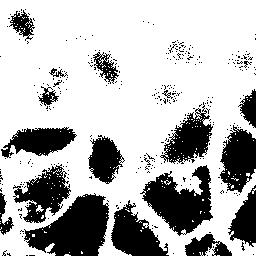
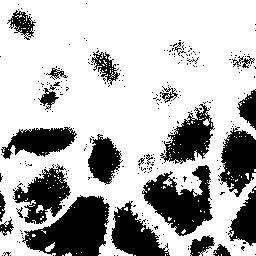
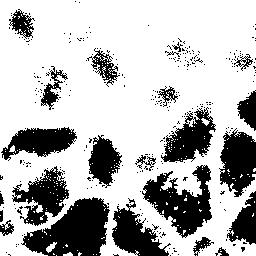
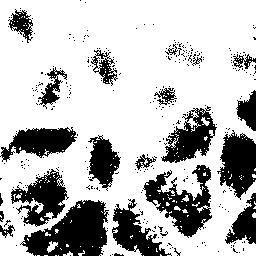
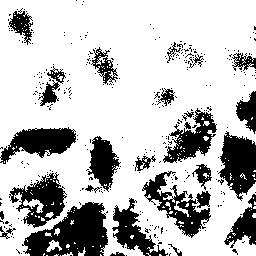
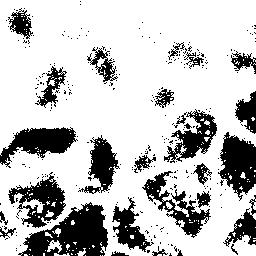
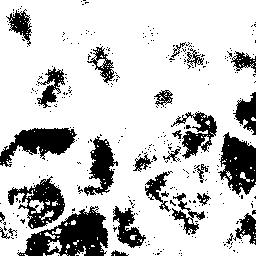
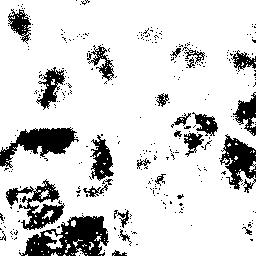
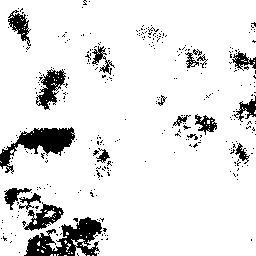
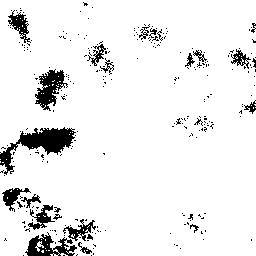
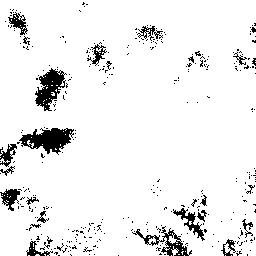
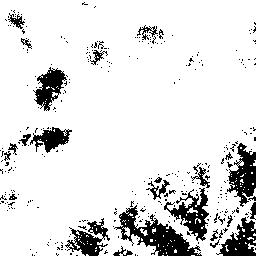
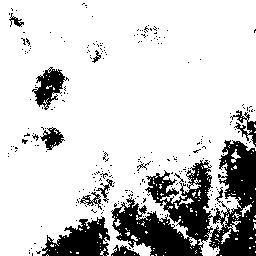
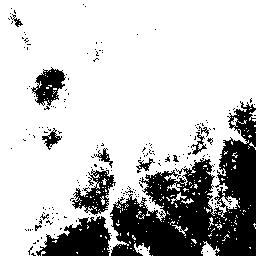
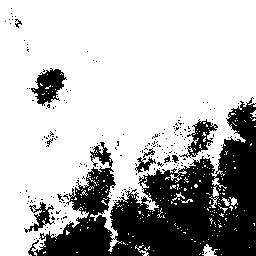
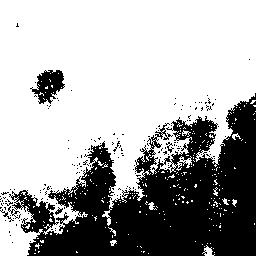
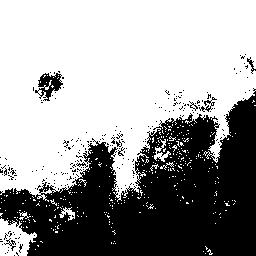
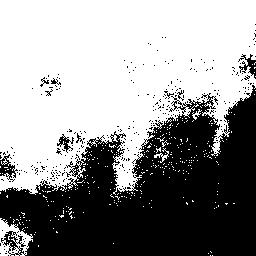
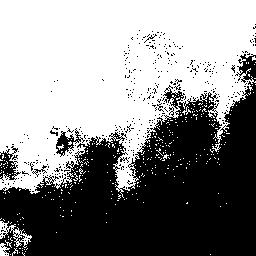
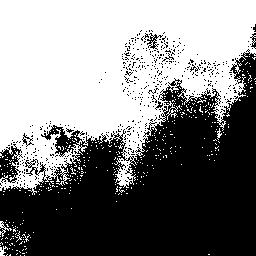
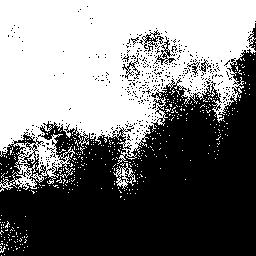
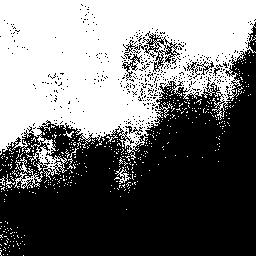
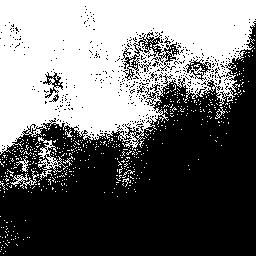
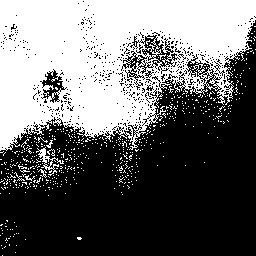
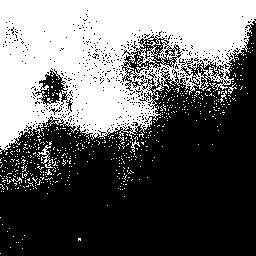

In [ ]:
fig = px.imshow(
    I_otsu,
    animation_frame=0,
    binary_string=True,
    binary_format="jpg",
)

plotly.io.show(fig)

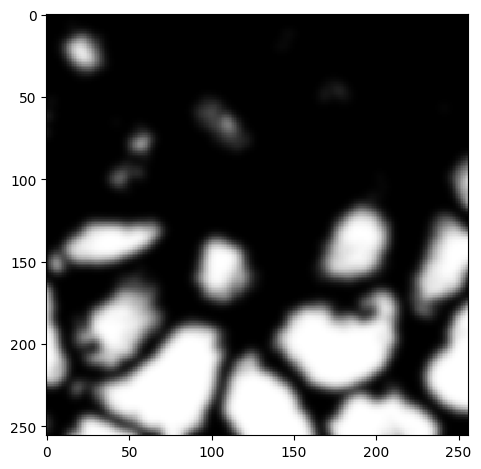

In [ ]:
#otsu frame 29
from skimage.measure import label
from skimage.color import label2rgb
from skimage.filters import gaussian

img = cells3d()
otsu_img = np.invert(I_otsu[29,:,:])
img_f = gaussian(otsu_img, 3)
sk.io.imshow(img_f)

In [ ]:
# label image regions:
label_image, nregions = label(img_f,return_num=True)
image_label_overlay = label2rgb(label_image, image=img_f)

In [ ]:
from skimage.measure import regionprops
props = regionprops(label_image)
for ireg in range(0,nregions):
    print('Area of region {} is = {} pixels'.format(ireg+1, props[ireg].area))


Area of region 1 is = 2 pixels
Area of region 2 is = 129 pixels
Area of region 3 is = 338 pixels
Area of region 4 is = 37 pixels
Area of region 5 is = 203 pixels


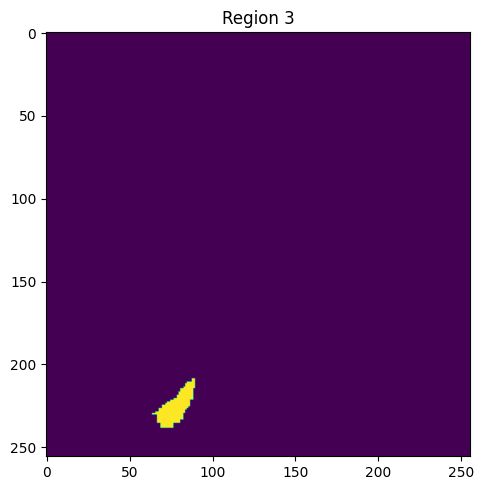

Area of Region 1: 2 pixels
Centroiod of Region 1: (201.0, 165.5) 
Eccentricity of Region 1: 1.0
Major Axis Length of Region 1: 2.0 pixels
Minor Axis Length of Region 1: 0.0 pixels
Perimeter of Region 1: 0.0 pixels
Orientation of Region 1: 1.5707963267948966 degrees


In [ ]:

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(label_image==3)
ax.set_title('Region 3') # set figure title
plt.tight_layout()
plt.show()

print('Area of Region 1: {} pixels'.format(props[0].area))
print('Centroiod of Region 1: {} '.format(props[0].centroid))
print('Eccentricity of Region 1: {}'.format(props[0].eccentricity))
print('Major Axis Length of Region 1: {} pixels'.format(props[0].major_axis_length))
print('Minor Axis Length of Region 1: {} pixels'.format(props[0].minor_axis_length))
print('Perimeter of Region 1: {} pixels'.format(props[0].perimeter))
print('Orientation of Region 1: {} degrees'.format(props[0].orientation))